# Airbnb Listing Price Prediction and Recommendation

### By: Samruddhi Chaudhari

## Problem statement: 
### Airbnb hosts in Amsterdam often struggle to determine the optimal price for their listings and may lack insights into factors that influence pricing decisions. Additionally, providing personalized recommendations to users based on their activity can enhance their experience and satisfaction with the platform. To address these issues, we aim to develop a price prediction and recommendation system for Airbnb listings in Amsterdam.

## Data: 
### The dataset consists of two main files: listings_details.csv and reviews.csv.

listings_details.csv:
Contains detailed information about Airbnb listings in Amsterdam, including features such as property type, location, amenities, host details, pricing, availability, rating, neighborhood, etc.
There are 20300 listings and every listing is associated with 96 features

reviews.csv:
Contains reviews for Airbnb listings in Amsterdam, including the listing ID, reviewer ID, review date, and review comments.
This dataset can be used for sentiment analysis and to provide additional insights into the quality and satisfaction level of listings.
There are 20300 reviews and every review has 6 attributes


# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Read and Analyze Information about Data

In [3]:
listings= pd.read_csv("listings_details.csv")

/var/folders/gr/57j44zg16q921scxf17sfsyc0000gn/T/ipykernel_47857/2570420250.py:1: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  listings= pd.read_csv("listings_details.csv")


In [4]:
listings.shape

(20030, 96)

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20030 non-null  int64  
 1   listing_url                       20030 non-null  object 
 2   scrape_id                         20030 non-null  int64  
 3   last_scraped                      20030 non-null  object 
 4   name                              19992 non-null  object 
 5   summary                           19510 non-null  object 
 6   space                             14579 non-null  object 
 7   description                       19906 non-null  object 
 8   experiences_offered               20030 non-null  object 
 9   neighborhood_overview             13257 non-null  object 
 10  notes                             9031 non-null   object 
 11  transit                           13635 non-null  object 
 12  acce

In [6]:
listings.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  2.003000e+04  2.003000e+04            0.0         0.0             0.0   
mean   1.541725e+07  2.018121e+13            NaN         NaN             NaN   
std    8.569404e+06  3.906348e+00            NaN         NaN             NaN   
min    2.818000e+03  2.018121e+13            NaN         NaN             NaN   
25%    8.188423e+06  2.018121e+13            NaN         NaN             NaN   
50%    1.563049e+07  2.018121e+13            NaN         NaN             NaN   
75%    2.202577e+07  2.018121e+13            NaN         NaN             NaN   
max    3.058041e+07  2.018121e+13            NaN         NaN             NaN   

            host_id  host_acceptance_rate  host_listings_count  \
count  2.003000e+04                   0.0         20026.000000   
mean   4.868570e+07                   NaN             6.105812   
std    5.649635e+07                   NaN            30.388516   
min    3.159000e+03                   NaN             0.000000   
25%    8.093516e+06                   NaN             1.000000   
50%    2.369450e+07                   NaN             1.000000   
75%    6.827535e+07                   NaN             1.000000   
max    2.293612e+08                   NaN           698.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               20026.000000                           0.0  20030.000000   
mean                    6.105812                           NaN     52.365212   
std                    30.388516                           NaN      0.015996   
min                     0.000000                           NaN     52.288378   
25%                     1.000000                           NaN     52.355126   
50%                     1.000000                           NaN     52.364590   
75%                     1.000000                           NaN     52.375074   
max                   698.000000                           NaN     52.424713   

          longitude  accommodates     bathrooms     bedrooms          beds  \
count  20030.000000  20030.000000  20020.000000  20022.00000  20023.000000   
mean       4.888977      2.891912      1.137662      1.44506      1.849223   
std        0.035573      1.318760      0.793903      0.88568      1.389664   
min        4.753247      1.000000      0.000000      0.00000      0.000000   
25%        4.863595      2.000000      1.000000      1.00000      1.000000   
50%        4.886387      2.000000      1.000000      1.00000      1.000000   
75%        4.908288      4.000000      1.000000      2.00000      2.000000   
max        5.027689     17.000000    100.500000     12.00000     32.000000   

       square_feet  guests_included  minimum_nights  maximum_nights  \
count   406.000000     20030.000000    20030.000000    20030.000000   
mean    520.485222         1.468997        3.328707      631.225711   
std     544.557660         0.937890       12.537419      541.339981   
min       0.000000         1.000000        1.000000        1.000000   
25%       0.000000         1.000000        2.000000       21.000000   
50%     484.000000         1.000000        2.000000     1125.000000   
75%     807.000000         2.000000        3.000000     1125.000000   
max    4306.000000        16.000000     1001.000000     9999.000000   

       availability_30  availability_60  availability_90  availability_365  \
count     20030.000000     20030.000000     20030.000000      20030.000000   
mean          4.905642        11.411233        18.168597         59.913679   
std           7.942903        17.498603        27.704834        104.027710   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         0.000000         0.000000          0.000000   
50%           0.000000         0.000000         0.000000          3.000000   
75%           7.000000        18.000000        28.000000         67.000000   
max          

## Removing columns that have more than 80% Null values

In [7]:
threshold = 0.80 * len(listings)
cols_to_drop = listings.columns[listings.isnull().sum() > threshold] 
listings.drop(cols_to_drop, axis = 1, inplace = True)

### Dropping unnecessary columns
Host details, all urls, availability of an Airbnb can be dropped as they don't contribute to the price variable

In [8]:
listings.drop(columns = ["availability_30", "has_availability", "availability_60", "availability_90", 
                         "availability_365", "host_is_superhost",
                        "host_total_listings_count", "host_verifications", "host_has_profile_pic", 
                         "host_identity_verified", "market", "last_review", "requires_license",
                        "jurisdiction_names", "is_business_travel_ready", "require_guest_profile_picture", 
                        "require_guest_phone_verification", "calculated_host_listings_count", 
                        "experiences_offered", "reviews_per_month", "bed_type","country", "country_code",
                        "access", "host_name", "city", "state", "smart_location", "name", "description", "space",
                        "host_since", 'host_location', 'host_about', "host_neighbourhood","guests_included", 
                         "calendar_updated", "notes", "interaction", "transit", "street", "zipcode",
                        "neighborhood_overview", "house_rules", "first_review",
                          "neighbourhood", "listing_url", "scrape_id", "last_scraped", "picture_url",
                        "host_url", "host_thumbnail_url", "host_picture_url", "calendar_last_scraped", "id", 
                         "host_id", "maximum_nights"], inplace = True)

## Converting string price variables to float

In [9]:
listings['price'] = listings['price'].str.replace('$', '').str.replace(",", "").astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '').str.replace(",", "").astype(float)
listings['security_deposit'] = listings['security_deposit'].str.replace('$', '').str.replace(",", "").astype(float)
listings['extra_people'] = listings['extra_people'].str.replace('$', '').str.replace(",", "").astype(float)
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').astype(float)

## Filling empty string values

In [10]:
listings.summary.fillna("", inplace = True)
listings.host_response_time.fillna("late response", inplace = True)

## Performing preprocessing using column transformer

- Filling empty values
- Applying one hot encoding to categorical features

In [11]:
num_pipeline1 = Pipeline([
    ("impute1", SimpleImputer(strategy = "constant", fill_value = 0)),
])

num_pipeline2 = Pipeline([
    ("impute2", SimpleImputer(strategy = "constant", fill_value = -1)),
])

cat_pipeline = Pipeline([
        ("ohe", OneHotEncoder(handle_unknown = "ignore", sparse_output=False)),  # Using the previously defined cat_encoder
])


num_attribs1 = ['security_deposit', 'cleaning_fee']
num_attribs2 = ['host_response_rate']

cat_attribs = ["neighbourhood_cleansed", "property_type", "room_type", "cancellation_policy", "host_response_time"]
remaining_cols = num_attribs1 + num_attribs2 + cat_attribs
remaining_df = listings.drop(columns = remaining_cols)

In [12]:
preprocessor = ColumnTransformer([
    ('num1', num_pipeline1, num_attribs1),
    ('num2', num_pipeline2, num_attribs2),
    ('cat', cat_pipeline, cat_attribs)
])

# Fit-transform the data
X_transformed = preprocessor.fit_transform(listings)

# Get transformed column names
transformed_columns = (
    preprocessor.named_transformers_['num1'].named_steps['impute1'].get_feature_names_out(num_attribs1).tolist() +
    preprocessor.named_transformers_['num2'].named_steps['impute2'].get_feature_names_out(num_attribs2).tolist() +
    preprocessor.named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(cat_attribs).tolist()
)

# Create a DataFrame with the transformed data and modified column names
X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_columns)

# Display the transformed DataFrame
X_transformed_df.head(1)

security_deposit  cleaning_fee  host_response_rate  \
0             100.0          50.0               100.0   

   neighbourhood_cleansed_Bijlmer-Centrum  \
0                                     0.0   

   neighbourhood_cleansed_Bijlmer-Oost  neighbourhood_cleansed_Bos en Lommer  \
0                                  0.0                                   0.0   

   neighbourhood_cleansed_Buitenveldert - Zuidas  \
0                                            0.0   

   neighbourhood_cleansed_Centrum-Oost  neighbourhood_cleansed_Centrum-West  \
0                                  0.0                                  0.0   

   neighbourhood_cleansed_De Aker - Nieuw Sloten  \
0                                            0.0   

   neighbourhood_cleansed_De Baarsjes - Oud-West  \
0                                            0.0   

   neighbourhood_cleansed_De Pijp - Rivierenbuurt  \
0                                             0.0   

   neighbourhood_cleansed_Gaasperdam - Driemond  \
0                                           0.0   

   neighbourhood_cleansed_Geuzenveld - Slotermeer  \
0                                             0.0   

   neighbourhood_cleansed_IJburg - Zeeburgereiland  \
0                                              0.0   

   neighbourhood_cleansed_Noord-Oost  neighbourhood_cleansed_Noord-West  \
0                                0.0                                0.0   

   neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt  \
0                                                1.0               

   neighbourhood_cleansed_Osdorp  neighbourhood_cleansed_Oud-Noord  \
0                            0.0                               0.0   

   neighbourhood_cleansed_Oud-Oost  neighbourhood_cleansed_Slotervaart  \
0                              0.0                                 0.0   

   neighbourhood_cleansed_Watergraafsmeer  neighbourhood_cleansed_Westerpark  \
0                                     0.0                                0.0   

   neighbourhood_cleansed_Zuid  property_type_Aparthotel  \
0                          0.0                       0.0   

   property_type_Apartment  property_type_Barn  \
0                      1.0                 0.0   

   property_type_Bed and breakfast  property_type_Boat  \
0                              0.0                 0.0   

   property_type_Boutique hotel  property_type_Bungalow  property_type_Cabin  \
0                           0.0                     0.0                  0.0   

   property_type_Camper/RV  property_type_Campsite  \
0                      0.0                     0.0   

   property_type_Casa particular (Cuba)  property_type_Castle  \
0                                   0.0                   0.0   

   property_type_Chalet  property_type_Condominium  property_type_Cottage  \
0                   0.0                        0.0                    0.0   

   property_type_Earth house  property_type_Guest suite  \
0                        0.0                        0.0   

   property_type_Guesthouse  property_type_Hostel  property_type_Hotel  \
0                       0.0                   0.0                  0.0   

   property_type_House  property_type_Houseboat  property_type_Lighthouse  \
0                  0.0                      0.0                       0.0   

   property_type_Loft  property_type_Nature lodge  property_type_Other  \
0                 0.0                         0.0                  0.0   

   property_type_Serviced apartment  property_type_Tent  \
0                               0.0                 0.0   

   property_type_Tiny house  property_type_Townhouse  property_type_Villa  \
0                       0.0                      0.0                  0.0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                        0.0                     1.0                    0.0   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                           0.0 

In [13]:
merged_df = pd.concat([X_transformed_df, remaining_df], axis=1)
merged_df.head(1)

security_deposit  cleaning_fee  host_response_rate  \
0             100.0          50.0               100.0   

   neighbourhood_cleansed_Bijlmer-Centrum  \
0                                     0.0   

   neighbourhood_cleansed_Bijlmer-Oost  neighbourhood_cleansed_Bos en Lommer  \
0                                  0.0                                   0.0   

   neighbourhood_cleansed_Buitenveldert - Zuidas  \
0                                            0.0   

   neighbourhood_cleansed_Centrum-Oost  neighbourhood_cleansed_Centrum-West  \
0                                  0.0                                  0.0   

   neighbourhood_cleansed_De Aker - Nieuw Sloten  \
0                                            0.0   

   neighbourhood_cleansed_De Baarsjes - Oud-West  \
0                                            0.0   

   neighbourhood_cleansed_De Pijp - Rivierenbuurt  \
0                                             0.0   

   neighbourhood_cleansed_Gaasperdam - Driemond  \
0                                           0.0   

   neighbourhood_cleansed_Geuzenveld - Slotermeer  \
0                                             0.0   

   neighbourhood_cleansed_IJburg - Zeeburgereiland  \
0                                              0.0   

   neighbourhood_cleansed_Noord-Oost  neighbourhood_cleansed_Noord-West  \
0                                0.0                                0.0   

   neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt  \
0                                                1.0               

   neighbourhood_cleansed_Osdorp  neighbourhood_cleansed_Oud-Noord  \
0                            0.0                               0.0   

   neighbourhood_cleansed_Oud-Oost  neighbourhood_cleansed_Slotervaart  \
0                              0.0                                 0.0   

   neighbourhood_cleansed_Watergraafsmeer  neighbourhood_cleansed_Westerpark  \
0                                     0.0                                0.0   

   neighbourhood_cleansed_Zuid  property_type_Aparthotel  \
0                          0.0                       0.0   

   property_type_Apartment  property_type_Barn  \
0                      1.0                 0.0   

   property_type_Bed and breakfast  property_type_Boat  \
0                              0.0                 0.0   

   property_type_Boutique hotel  property_type_Bungalow  property_type_Cabin  \
0                           0.0                     0.0                  0.0   

   property_type_Camper/RV  property_type_Campsite  \
0                      0.0                     0.0   

   property_type_Casa particular (Cuba)  property_type_Castle  \
0                                   0.0                   0.0   

   property_type_Chalet  property_type_Condominium  property_type_Cottage  \
0                   0.0                        0.0                    0.0   

   property_type_Earth house  property_type_Guest suite  \
0                        0.0                        0.0   

   property_type_Guesthouse  property_type_Hostel  property_type_Hotel  \
0                       0.0                   0.0                  0.0   

   property_type_House  property_type_Houseboat  property_type_Lighthouse  \
0                  0.0                      0.0                       0.0   

   property_type_Loft  property_type_Nature lodge  property_type_Other  \
0                 0.0                         0.0                  0.0   

   property_type_Serviced apartment  property_type_Tent  \
0                               0.0                 0.0   

   property_type_Tiny house  property_type_Townhouse  property_type_Villa  \
0                       0.0                      0.0                  0.0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                        0.0                     1.0                    0.0   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                           0.0 

## Dropping rows which have null values

In [14]:
df = merged_df.copy()

df.dropna(subset = ["review_scores_rating", "host_listings_count", "bathrooms",
                              "bedrooms", "beds", "review_scores_accuracy", "review_scores_cleanliness", 
                              "review_scores_checkin", "review_scores_communication", "review_scores_location",
                              "review_scores_value"], inplace = True)

## Preprocessing amenities column

Amenities column is in the form of a dictionary. We've separated each amenity in that list into separate columns and added a value of 1 if a particular amenity is present for a listing

In [15]:
df['amenities'] = df['amenities'].str.strip('{}').str.replace('"', '')

# Create a set of all unique amenities
all_amenities = set(','.join(df['amenities']).split(','))

# Create binary columns for each amenity
for amenity in all_amenities:
    df[amenity] = df['amenities'].str.contains(amenity).astype(int)

# Drop the original 'amenities' column
df.drop('amenities', axis=1, inplace=True)

/var/folders/gr/57j44zg16q921scxf17sfsyc0000gn/T/ipykernel_47857/1859422531.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[amenity] = df['amenities'].str.contains(amenity).astype(int)
/var/folders/gr/57j44zg16q921scxf17sfsyc0000gn/T/ipykernel_47857/1859422531.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[amenity] = df['amenities'].str.contains(amenity).astype(int)
/var/folders/gr/57j44zg16q921scxf17sfsyc0000gn/T/ipykernel_47857/1859422531.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[amenity] = df['amenities'].str.contains(amenity).astype(int)
/var/folders/gr/57j44zg16q921scxf17sfsyc0000gn/T/ipykernel_47857/1859422531.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

## Replacing True, False, t and f with 1 and 0

In [16]:
df.drop(columns = ["translation missing: en.hosting_amenity_49"], inplace = True)
df.replace(to_replace = True, value = 1, inplace = True)
df.replace(to_replace = False, value = 0, inplace = True)

df.replace(to_replace = 't', value = 1, inplace = True)
df.replace(to_replace = 'f', value = 0, inplace = True)

In [126]:
#Final df

df.head(1)

security_deposit  cleaning_fee  host_response_rate  \
0             100.0          50.0               100.0   

   neighbourhood_cleansed_Bijlmer-Centrum  \
0                                     0.0   

   neighbourhood_cleansed_Bijlmer-Oost  neighbourhood_cleansed_Bos en Lommer  \
0                                  0.0                                   0.0   

   neighbourhood_cleansed_Buitenveldert - Zuidas  \
0                                            0.0   

   neighbourhood_cleansed_Centrum-Oost  neighbourhood_cleansed_Centrum-West  \
0                                  0.0                                  0.0   

   neighbourhood_cleansed_De Aker - Nieuw Sloten  \
0                                            0.0   

   neighbourhood_cleansed_De Baarsjes - Oud-West  \
0                                            0.0   

   neighbourhood_cleansed_De Pijp - Rivierenbuurt  \
0                                             0.0   

   neighbourhood_cleansed_Gaasperdam - Driemond  \
0                                           0.0   

   neighbourhood_cleansed_Geuzenveld - Slotermeer  \
0                                             0.0   

   neighbourhood_cleansed_IJburg - Zeeburgereiland  \
0                                              0.0   

   neighbourhood_cleansed_Noord-Oost  neighbourhood_cleansed_Noord-West  \
0                                0.0                                0.0   

   neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt  \
0                                                1.0               

   neighbourhood_cleansed_Osdorp  neighbourhood_cleansed_Oud-Noord  \
0                            0.0                               0.0   

   neighbourhood_cleansed_Oud-Oost  neighbourhood_cleansed_Slotervaart  \
0                              0.0                                 0.0   

   neighbourhood_cleansed_Watergraafsmeer  neighbourhood_cleansed_Westerpark  \
0                                     0.0                                0.0   

   neighbourhood_cleansed_Zuid  property_type_Aparthotel  \
0                          0.0                       0.0   

   property_type_Apartment  property_type_Barn  \
0                      1.0                 0.0   

   property_type_Bed and breakfast  property_type_Boat  \
0                              0.0                 0.0   

   property_type_Boutique hotel  property_type_Bungalow  property_type_Cabin  \
0                           0.0                     0.0                  0.0   

   property_type_Camper/RV  property_type_Campsite  \
0                      0.0                     0.0   

   property_type_Casa particular (Cuba)  property_type_Castle  \
0                                   0.0                   0.0   

   property_type_Chalet  property_type_Condominium  property_type_Cottage  \
0                   0.0                        0.0                    0.0   

   property_type_Earth house  property_type_Guest suite  \
0                        0.0                        0.0   

   property_type_Guesthouse  property_type_Hostel  property_type_Hotel  \
0                       0.0                   0.0                  0.0   

   property_type_House  property_type_Houseboat  property_type_Lighthouse  \
0                  0.0                      0.0                       0.0   

   property_type_Loft  property_type_Nature lodge  property_type_Other  \
0                 0.0                         0.0                  0.0   

   property_type_Serviced apartment  property_type_Tent  \
0                               0.0                 0.0   

   property_type_Tiny house  property_type_Townhouse  property_type_Villa  \
0                       0.0                      0.0                  0.0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                        0.0                     1.0                    0.0   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                           0.0 

## Correlation evaluation

In [17]:
cor = df.corrwith(df['price'], numeric_only = True).sort_values(ascending = False)
cor[:20]

price                                  1.000000
accommodates                           0.348175
bedrooms                               0.312406
beds                                   0.302509
cleaning_fee                           0.247708
room_type_Entire home/apt              0.192878
Dryer                                  0.130463
Indoor fireplace                       0.130387
Family/kid friendly                    0.118739
security_deposit                       0.116905
neighbourhood_cleansed_Centrum-West    0.106172
TV                                     0.106021
Bathtub                                0.104339
Children’s books and toys              0.103063
review_scores_location                 0.100473
High chair                             0.096553
Suitable for events                    0.095377
bathrooms                              0.089471
Babysitter recommendations             0.087005
Iron                                   0.086088
dtype: float64

# EDA

## Visualizing distribution of listings across Amsterdam

In [18]:
lats2018 = df['latitude'].tolist()
lons2018 = df['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

### Maximum listings are for room type-entire apartment 

Number of room types : 3

room_type
Entire home/apt    15889
Private room        4076
Shared room           65
Name: count, dtype: int64


/Users/sayali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


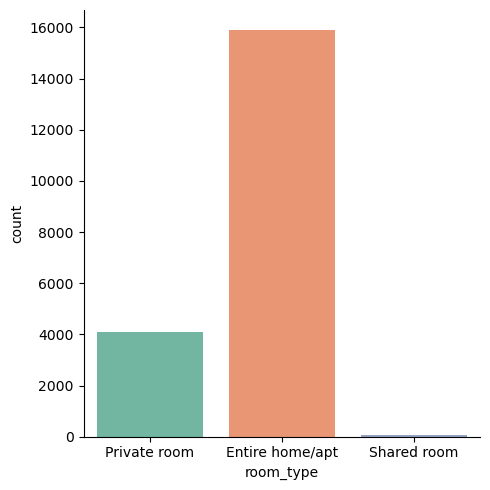

In [19]:
# Number of room types
print("Number of room types :", len(listings["room_type"].unique()))
print()

# Number of listings of each room type
print(listings["room_type"].value_counts())
sns.catplot(x = "room_type", data = listings, kind = "count", palette="Set2")

### neighbourhoods vs property type with the median price

<Axes: xlabel='property_type', ylabel='neighbourhood_cleansed'>

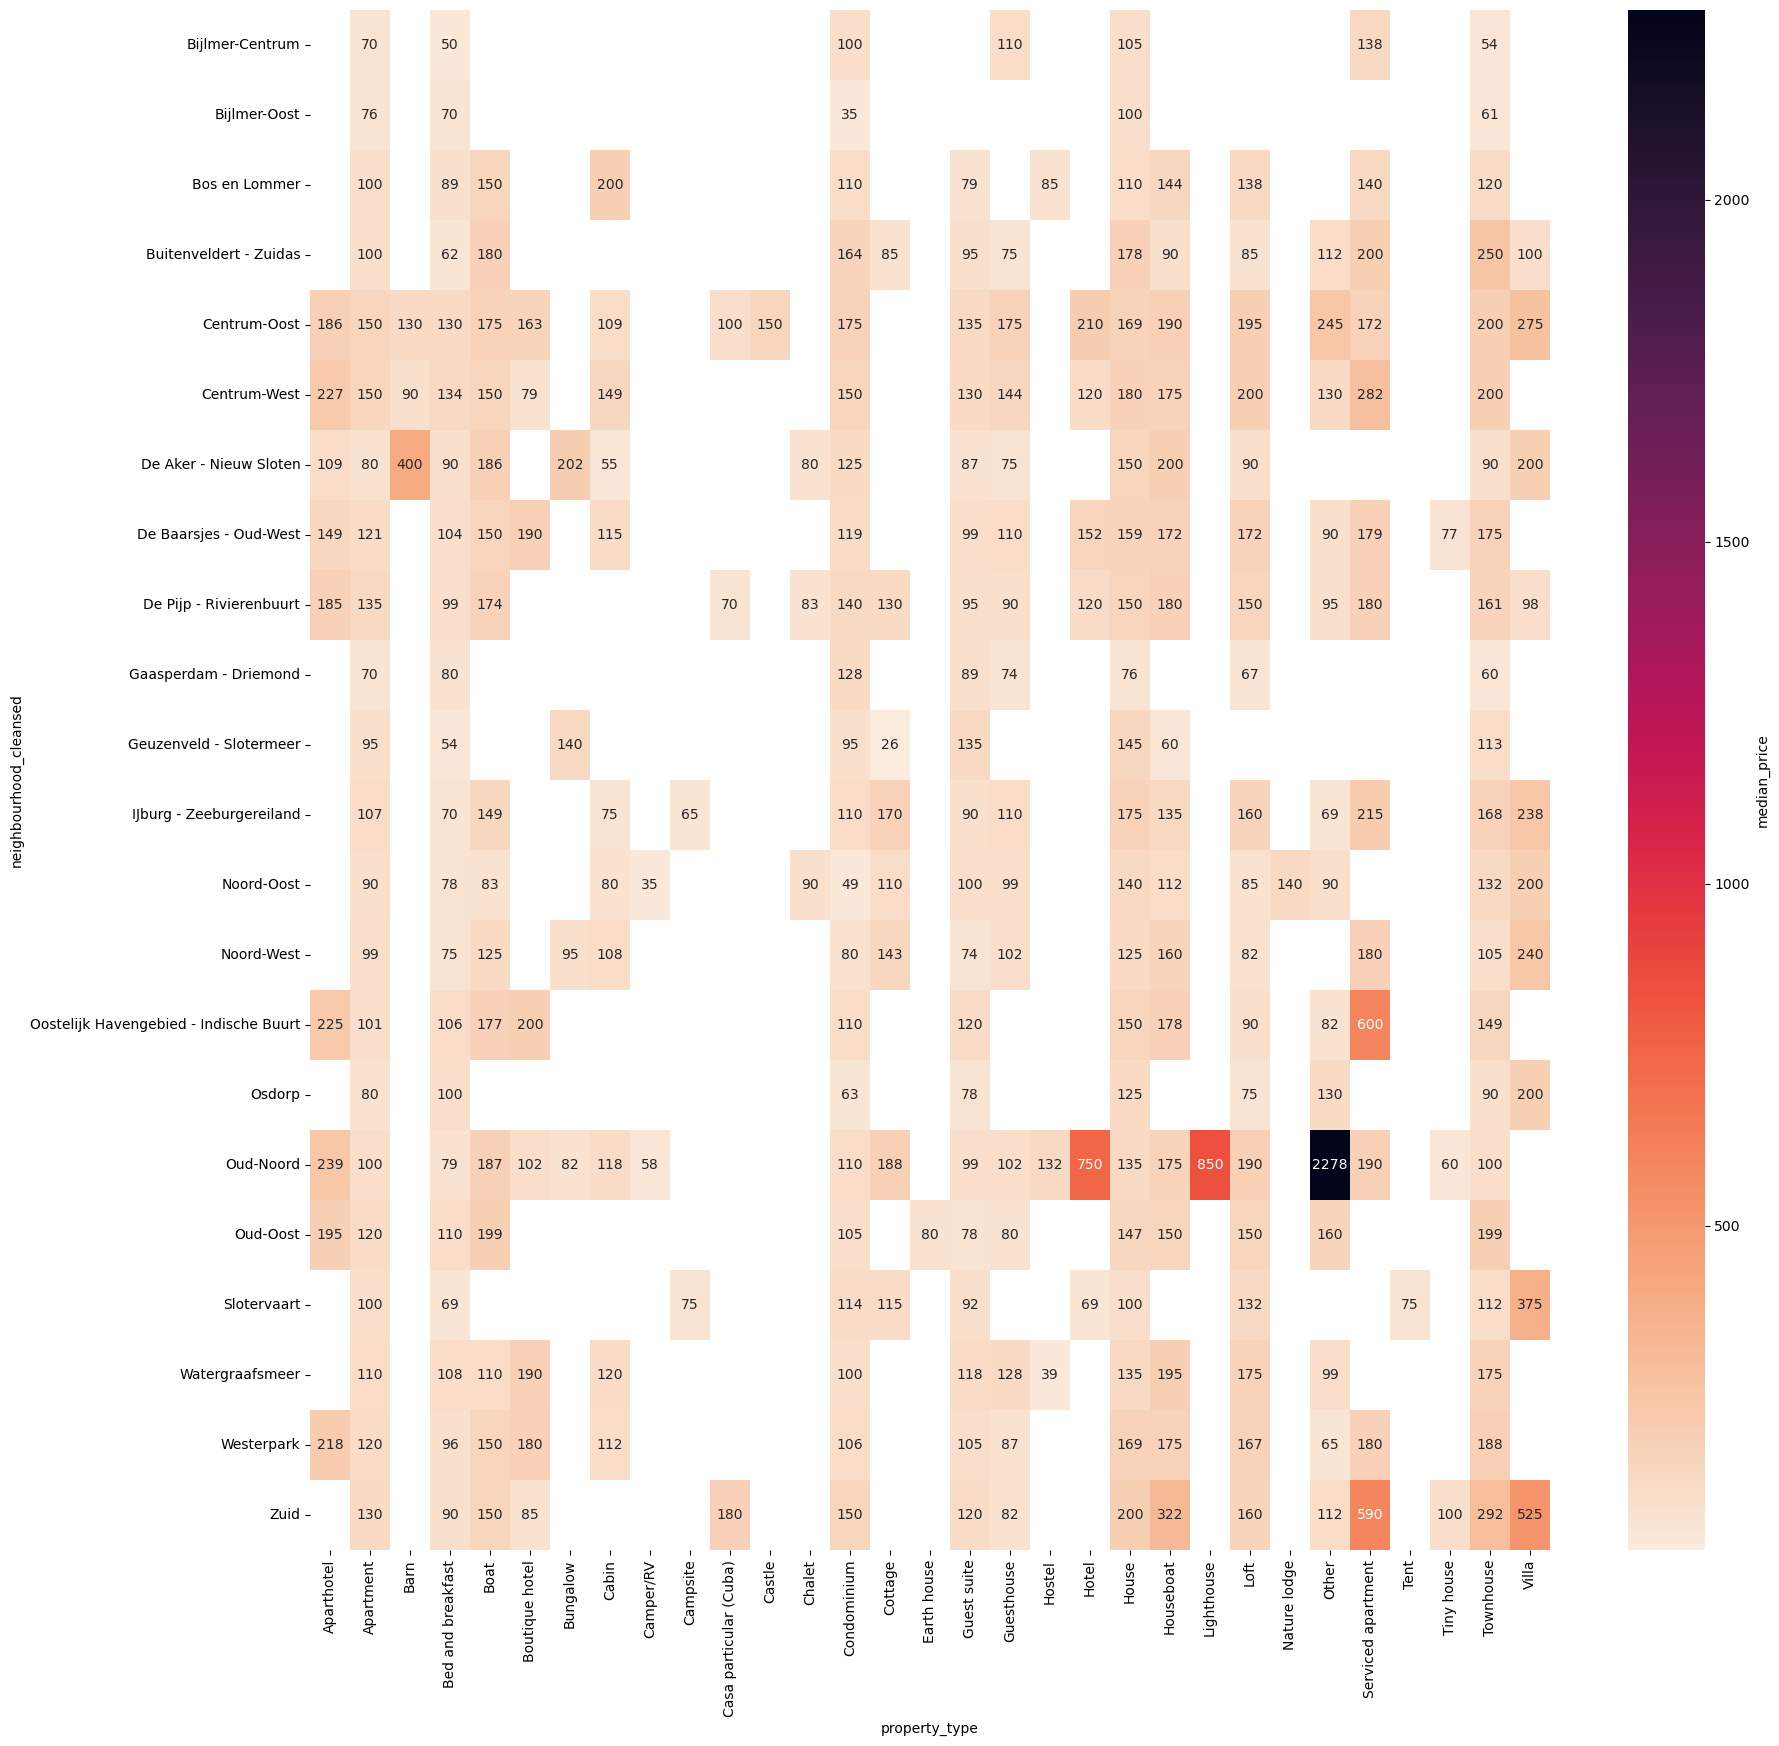

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(listings.groupby([
        'neighbourhood_cleansed', 'property_type']).price.median().unstack(),
            annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'median_price'})

### Heatmap of the mean price for room type and a property type

<Axes: xlabel='room_type', ylabel='property_type'>

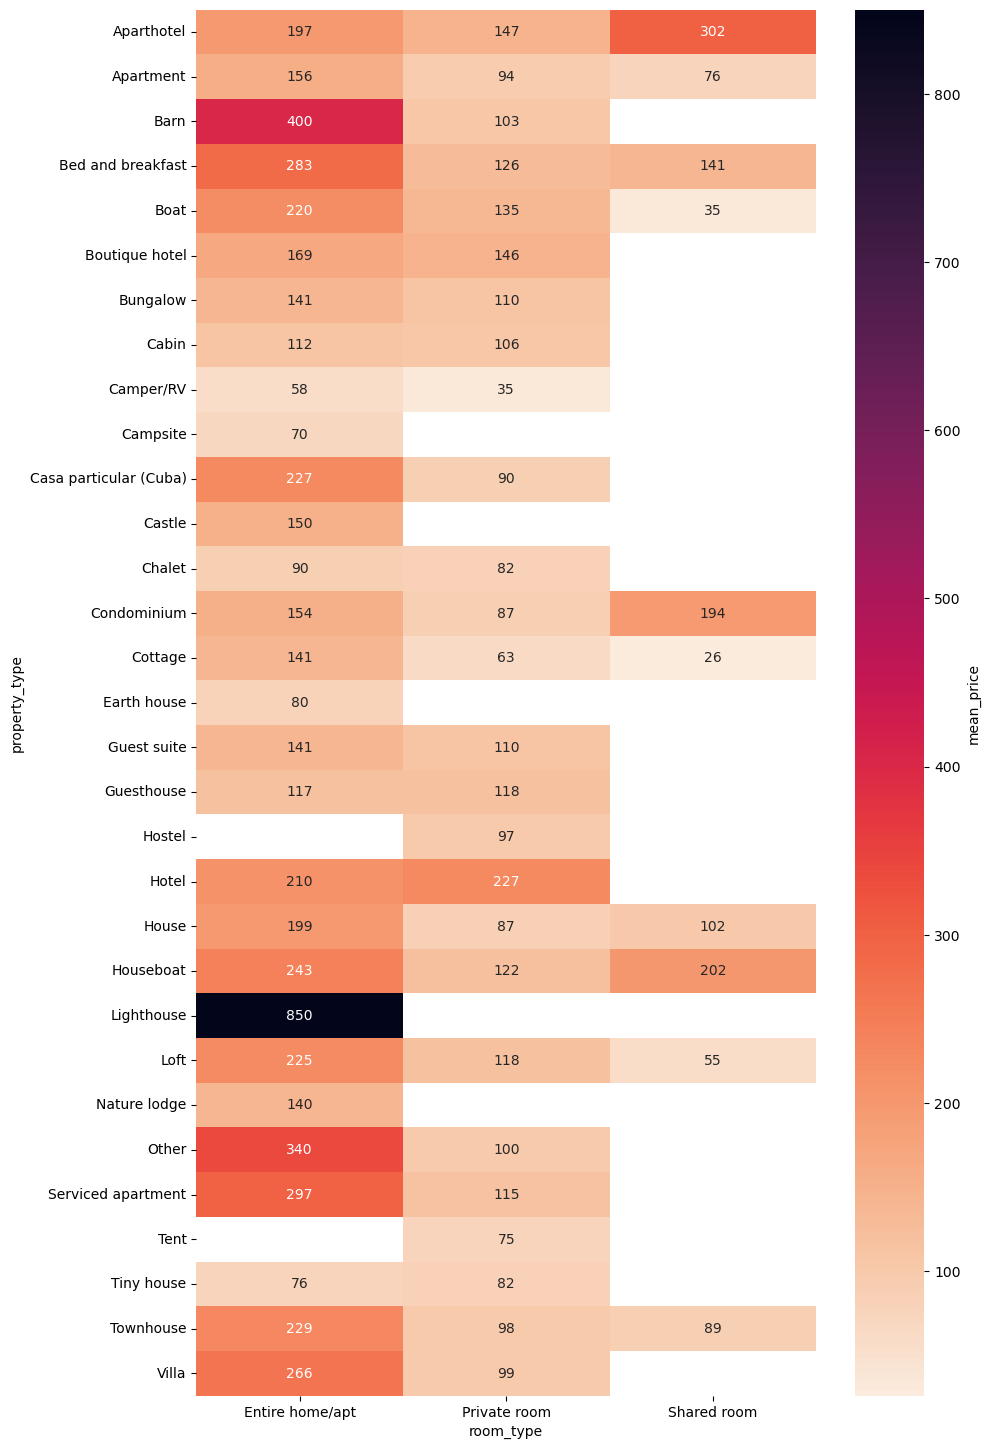

In [21]:
plt.figure(figsize = (10,18))
sns.heatmap(listings.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

### Vizualizing the commonly offered amenities

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sayali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sayali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
import nltk
from nltk.corpus import stopwords
import re

# Create a dataframe of the words that appear in the amenities section of the most expensive listings
amenitiesDF = listings[['amenities', 'price']]
amenitiesDFTopper = amenitiesDF.sort_values('price', ascending=[0])
amenitiesDFtop = amenitiesDFTopper

allemenities = ''
for index, row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+', ' ', row['amenities'])
    allemenities += p + ' '  

allemenities_data = nltk.word_tokenize(allemenities)
filtered_data = [word for word in allemenities_data if word.lower() not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
allemenities_data = [wnl.lemmatize(data) for data in filtered_data]
allemenities_words = ' '.join(allemenities_data)

print(allemenities_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



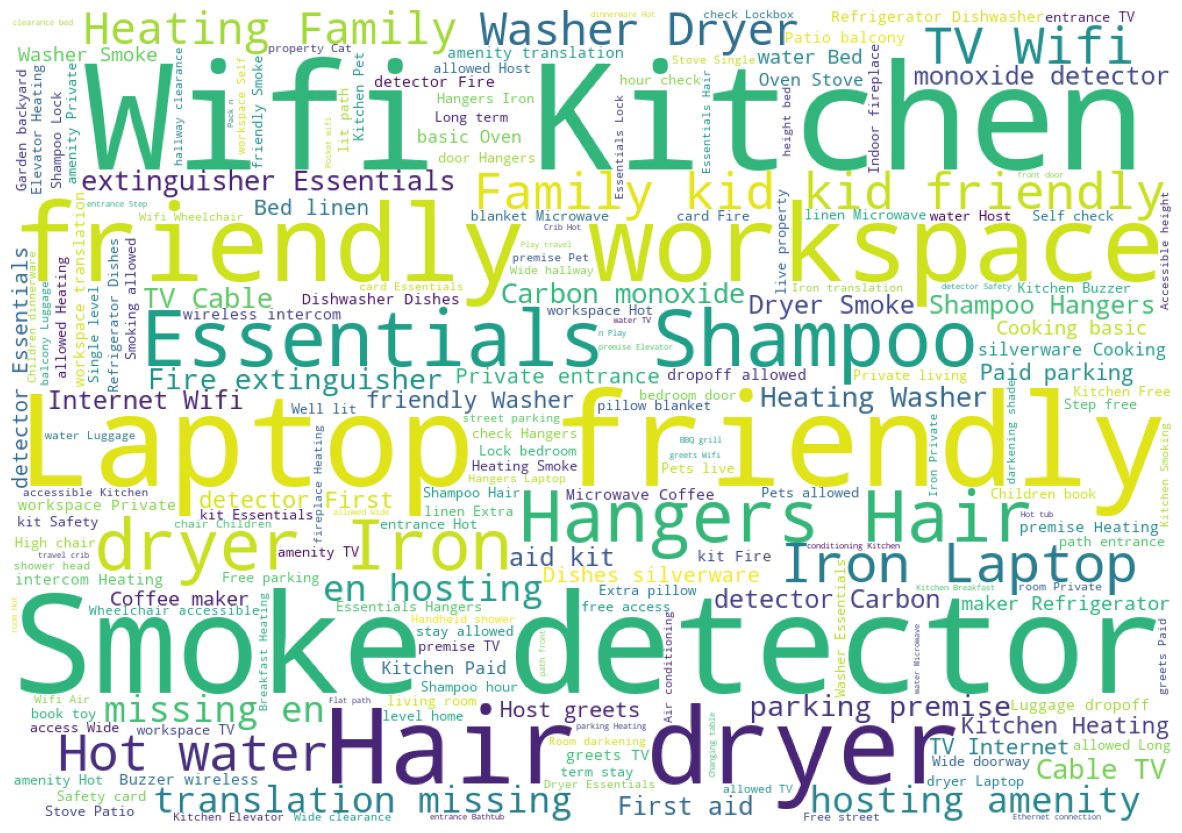

In [24]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Analysing the effects of reviews on the price of the Airbnb.

In [25]:
reviewsDF= pd.read_csv("reviews_details.csv")

In [26]:
reviewsDF.head()

listing_id    id        date  reviewer_id reviewer_name  \
0        2818  1191  2009-03-30        10952           Lam   
1        2818  1771  2009-04-24        12798         Alice   
2        2818  1989  2009-05-03        11869       Natalja   
3        2818  2797  2009-05-18        14064       Enrique   
4        2818  3151  2009-05-25        17977       Sherwin   

                                            comments  
0  Daniel is really cool. The place was nice and ...  
1  Daniel is the most amazing host! His place is ...  
2  We had such a great time in Amsterdam. Daniel ...  
3  Very professional operation. Room is very clea...  
4  Daniel is highly recommended.  He provided all...

In [27]:
reviewsDF['comments'] = reviewsDF['comments'].astype(str)

In [28]:
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value'] = "Default"
reviewsDF['neg'] = 0.0
reviewsDF['pos'] = 0.0
reviewsDF['neu'] = 0.0
reviewsDF['compound'] = 0.0

for index, row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.at[index, 'polarity_value'] = ss
    reviewsDF.at[index, 'neg'] = ss['neg']
    reviewsDF.at[index, 'pos'] = ss['pos']
    reviewsDF.at[index, 'neu'] = ss['neu']
    reviewsDF.at[index, 'compound'] = ss['compound']

reviewsDF.head()

listing_id    id        date  reviewer_id reviewer_name  \
0        2818  1191  2009-03-30        10952           Lam   
1        2818  1771  2009-04-24        12798         Alice   
2        2818  1989  2009-05-03        11869       Natalja   
3        2818  2797  2009-05-18        14064       Enrique   
4        2818  3151  2009-05-25        17977       Sherwin   

                                            comments  \
0  Daniel is really cool. The place was nice and ...   
1  Daniel is the most amazing host! His place is ...   
2  We had such a great time in Amsterdam. Daniel ...   
3  Very professional operation. Room is very clea...   
4  Daniel is highly recommended.  He provided all...   

                                      polarity_value    neg    pos    neu  \
0  {'neg': 0.047, 'neu': 0.694, 'pos': 0.259, 'co...  0.047  0.259  0.694   
1  {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'comp...  0.000  0.316  0.684   
2  {'neg': 0.027, 'neu': 0.676, 'pos': 0.297, 'co...  0.027  0.297  0.676   
3  {'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...  0.000  0.470  0.530   
4  {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'comp...  0.000  0.258  0.742   

   compound  
0    0.8843  
1    0.9667  
2    0.9732  
3    0.9716  
4    0.9272

In [29]:
def detect_lang(sente):
    sente = str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index, row in reviewsDF.iterrows():
    lang = detect_lang(row['comments'])
    reviewsDF.at[index, 'language'] = lang 

EngReviewsDF = reviewsDF[reviewsDF['language'] == 'en']

EngReviewsDF.head(2)

listing_id    id        date  reviewer_id reviewer_name  \
0        2818  1191  2009-03-30        10952           Lam   
1        2818  1771  2009-04-24        12798         Alice   

                                            comments  \
0  Daniel is really cool. The place was nice and ...   
1  Daniel is the most amazing host! His place is ...   

                                      polarity_value    neg    pos    neu  \
0  {'neg': 0.047, 'neu': 0.694, 'pos': 0.259, 'co...  0.047  0.259  0.694   
1  {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'comp...  0.000  0.316  0.684   

   compound language  
0    0.8843       en  
1    0.9667       en

In [30]:
# Create a DataFrame for positive sentiments
polarDF = EngReviewsDF[['pos']]
polarDF = polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF = polarDF.rename(columns={'pos': 'count_of_Comments'})
polarDF = polarDF.reset_index()
polarDF = polarDF.rename(columns={'pos': 'range_i'})

for i, r in polarDF.iterrows():
    polarDF.at[i, 'RANGE'] = float(str(r['range_i'])[1:4].replace(',', ''))
    polarDF.at[i, 'Sentiment'] = 'positive'

del polarDF['range_i']
polarDF.head()

count_of_Comments  RANGE Sentiment
0               6034    0.0  positive
1              44131    0.1  positive
2             100474    0.2  positive
3              92047    0.3  positive
4              50176    0.4  positive

In [32]:
# Create a DataFrame for negative sentiments
polarDFneg = EngReviewsDF[['neg']]
polarDFneg = polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg = polarDFneg.rename(columns={'neg': 'count_of_Comments'})
polarDFneg = polarDFneg.reset_index()
polarDFneg = polarDFneg.rename(columns={'neg': 'range_i'})

for i, r in polarDFneg.iterrows():
    polarDFneg.at[i, 'RANGE'] = float(str(r['range_i'])[1:4].replace(',', ''))
    polarDFneg.at[i, 'Sentiment'] = 'negative'

del polarDFneg['range_i']

polarDF = pd.concat([polarDF, polarDFneg[['count_of_Comments', 'RANGE', 'Sentiment']]], ignore_index=True)
polarDFneg.head()

count_of_Comments  RANGE Sentiment
0              77215    0.0  negative
1               5771    0.1  negative
2                661    0.2  negative
3                152    0.3  negative
4                 55    0.4  negative

In [34]:
# Create a DataFrame for neutral sentiments
polarDFnut = EngReviewsDF[['neu']]
polarDFnut = polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut = polarDFnut.rename(columns={'neu': 'count_of_Comments'})
polarDFnut = polarDFnut.reset_index()
polarDFnut = polarDFnut.rename(columns={'neu': 'range_i'})

for i, r in polarDFnut.iterrows():
    polarDFnut.at[i, 'RANGE'] = float(str(r['range_i'])[1:4].replace(',', ''))
    polarDFnut.at[i, 'Sentiment'] = 'neutral'

del polarDFnut['range_i']

polarDF = pd.concat([polarDF, polarDFnut[['count_of_Comments', 'RANGE', 'Sentiment']]], ignore_index=True)

polarDFnut.head()

count_of_Comments  RANGE Sentiment
0                 39    0.0   neutral
1               2385    0.1   neutral
2               6317    0.2   neutral
3              11977    0.3   neutral
4              25387    0.4   neutral

/Users/sayali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

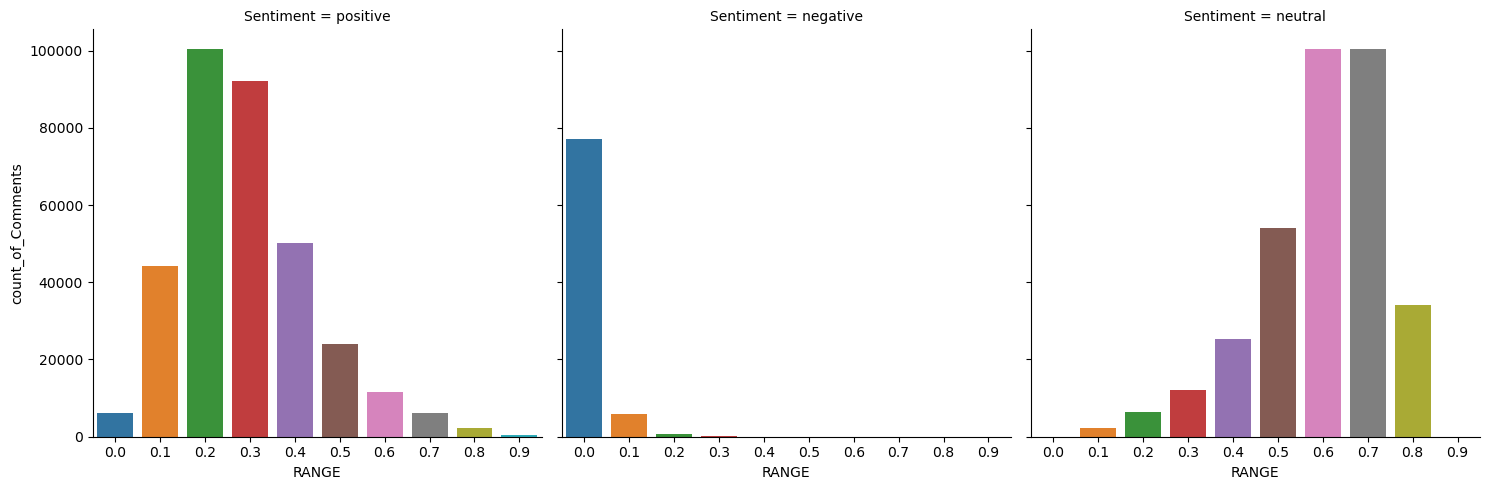

In [35]:
# Visualizing the sentiment counts

plt.figure(figsize=(10, 10))
sns.catplot(data=polarDF, x="RANGE", y="count_of_Comments", col="Sentiment", kind="bar")
plt.show()

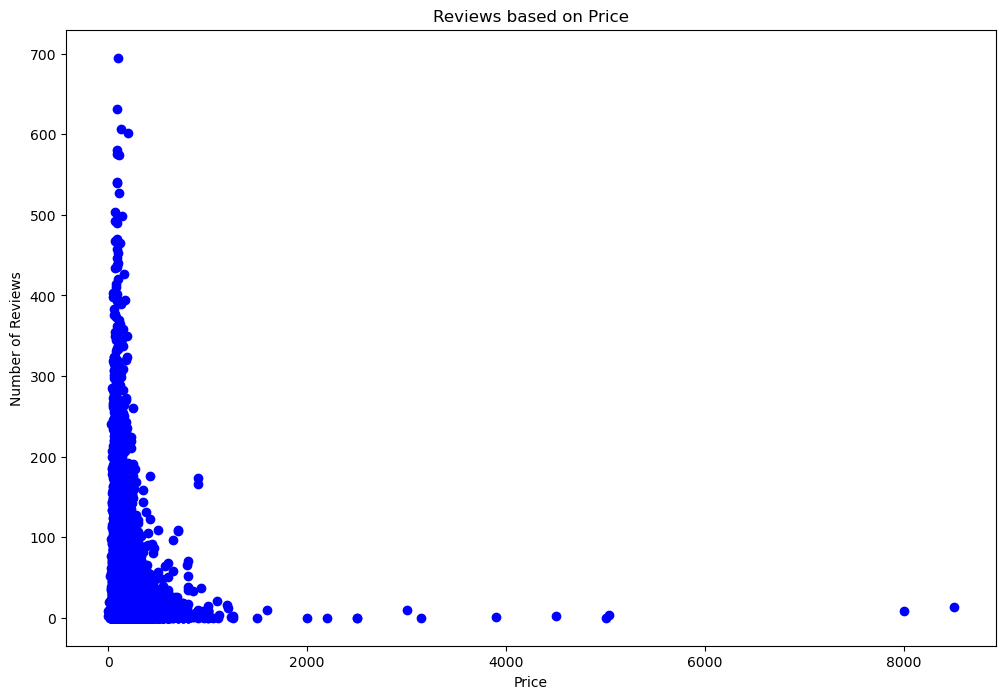

In [36]:
# Sorting DataFrame by price
price_review = listings[['number_of_reviews', 'price']].sort_values(by='price')

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(x=price_review['price'], y=price_review['number_of_reviews'], marker='o', color='blue')

plt.title('Reviews based on Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

plt.show()

<Axes: >

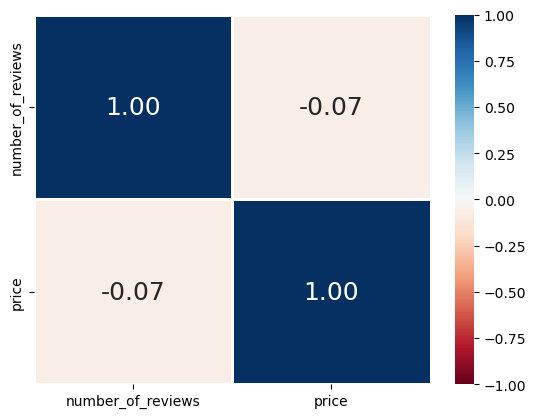

In [37]:
sns.heatmap(price_review.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From the above correlation matrix, we can clearly see that number of reviews and the price of a listing has a very weak negative correlation. Hence we can conclude that the number of reviews a listing receives does not have much of an impact on the price.

As all the listings are for Amsterdam, latitude and longitude attributes have very little variations.

Hence, number of reviews, latitude and longitude can be dropped

In [39]:
df.drop(columns = ["number_of_reviews", "latitude", "longitude"], inplace = True)

In [40]:
df.drop(columns=["summary"], inplace=True)

# Clustering

/Users/sayali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sayali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sayali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sayali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sayali/an

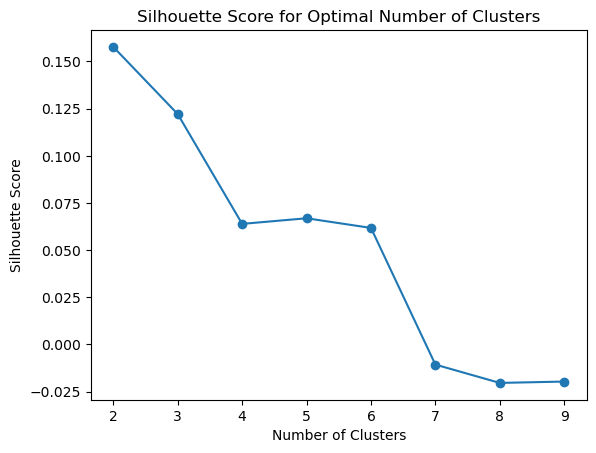

/Users/sayali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


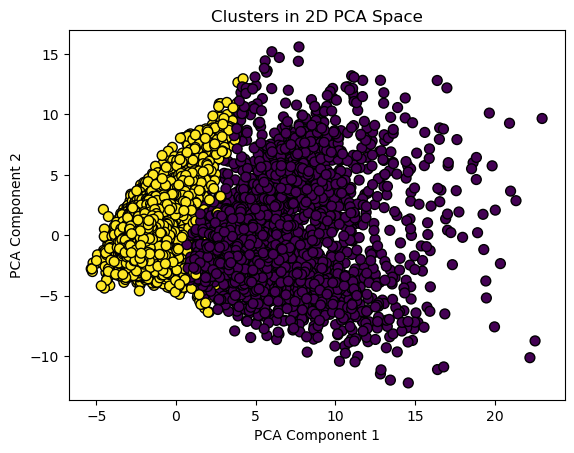

In [41]:
X = df.drop(columns = ["price"])
y = df.price

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot the Silhouette Scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (highest silhouette score)
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

k_df = X.copy()

# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
k_df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

k_df['pca_1'] = pca_result[:, 0]
k_df['pca_2'] = pca_result[:, 1]

# Plot clusters in 2D space
plt.scatter(k_df['pca_1'], k_df['pca_2'], c=k_df['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters in 2D PCA Space')
plt.show()

In [42]:
cluster_characteristics = k_df.groupby('cluster')[k_df.columns].mean()
cluster_characteristics

security_deposit  cleaning_fee  host_response_rate  \
cluster                                                       
0              184.306249     37.266240           61.111982   
1              141.569050     30.855016           47.193259   

         neighbourhood_cleansed_Bijlmer-Centrum  \
cluster                                           
0                                      0.006187   
1                                      0.004643   

         neighbourhood_cleansed_Bijlmer-Oost  \
cluster                                        
0                                   0.003712   
1                                   0.005124   

         neighbourhood_cleansed_Bos en Lommer  \
cluster                                         
0                                    0.060012   
1                                    0.056841   

         neighbourhood_cleansed_Buitenveldert - Zuidas  \
cluster                                                  
0                                             0.012374   
1                                             0.011208   

         neighbourhood_cleansed_Centrum-Oost  \
cluster                                        
0                                   0.080223   
1                                   0.088063   

         neighbourhood_cleansed_Centrum-West  \
cluster                                        
0                                   0.107032   
1                                   0.122888   

         neighbourhood_cleansed_De Aker - Nieuw Sloten  \
cluster                                                  
0                                             0.008043   
1                                             0.005764   

         neighbourhood_cleansed_De Baarsjes - Oud-West  \
cluster                                                  
0                                             0.170963   
1                                             0.181331   

         neighbourhood_cleansed_De Pijp - Rivierenbuurt  \
cluster                                                   
0                                               0.11920   
1                                               0.12537   

         neighbourhood_cleansed_Gaasperdam - Driemond  \
cluster                                                 
0                                            0.007630   
1                                            0.005764   

         neighbourhood_cleansed_Geuzenveld - Slotermeer  \
cluster                                                   
0                                              0.011549   
1                                              0.009367   

         neighbourhood_cleansed_IJburg - Zeeburgereiland  \
cluster                                                    
0                                               0.026810   
1                                               0.019534   

         neighbourhood_cleansed_Noord-Oost  neighbourhood_cleansed_Noord-West  \
cluster                                                                         
0                                 0.013405                           0.020004   
1                                 0.011688                           0.014090   

         neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt  \
cluster                                                                  
0                                                 0.043514               
1                                                 0.050837               

         neighbourhood_cleansed_Osdorp  neighbourhood_cleansed_Oud-Noord  \
cluster                                                                    
0                             0.008455                          0.037740   
1                             0.007846                          0.025378   

         neighbourhood_cleansed_Oud-Oost  neighbourhood_cleansed_Slotervaart  \
cluster                                                                        
0                               0.063518     

In [43]:
cluster_characteristics.drop(columns = ["cluster", "pca_1", "pca_2"], inplace = True)

In [44]:
def top_centroids(difference, n_features=5):
    top_features = {}
    for cluster in difference.index:
        cluster_data = difference.loc[cluster]
        top_features[cluster] = cluster_data.abs().nlargest(n_features).to_dict()
    return pd.DataFrame(top_features).T


# Calculate the mean for each feature in each cluster
cluster_means = cluster_characteristics.groupby('cluster').mean()

# Calculate the mean difference across clusters for each feature
mean_diff = cluster_means.diff().abs().mean()

# Select the top 5 features with the maximum mean difference values
top_features = mean_diff.nlargest(5)

for feature, diff in top_features.items():
    cluster_diff = cluster_means[feature].diff().abs()
    print(f"Feature: {feature}, Mean Difference: {diff}")
    for cluster, val in cluster_means[feature].items():
        if not pd.isnull(val):
            print(f"Cluster {cluster}: {val}")
    print()

Feature: security_deposit, Mean Difference: 42.7371989952791
Cluster 0: 184.30624871107446
Cluster 1: 141.56904971579536

Feature: host_response_rate, Mean Difference: 13.918722705342695
Cluster 0: 61.111981851928235
Cluster 1: 47.19325914658554

Feature: cleaning_fee, Mean Difference: 6.411224850710823
Cluster 0: 37.266240461950915
Cluster 1: 30.85501561124009

Feature: extra_people, Mean Difference: 3.866235238144407
Cluster 0: 14.651680758919365
Cluster 1: 10.785445520774958

Feature: host_listings_count, Mean Difference: 3.8528194496779276
Cluster 0: 7.677253041864302
Cluster 1: 3.824433592186374



Difference between clusters is maximum for security_deposit, host_response_rate, cleaning_fee, extra_people, host_listings_count

# Dimensionality Reduction

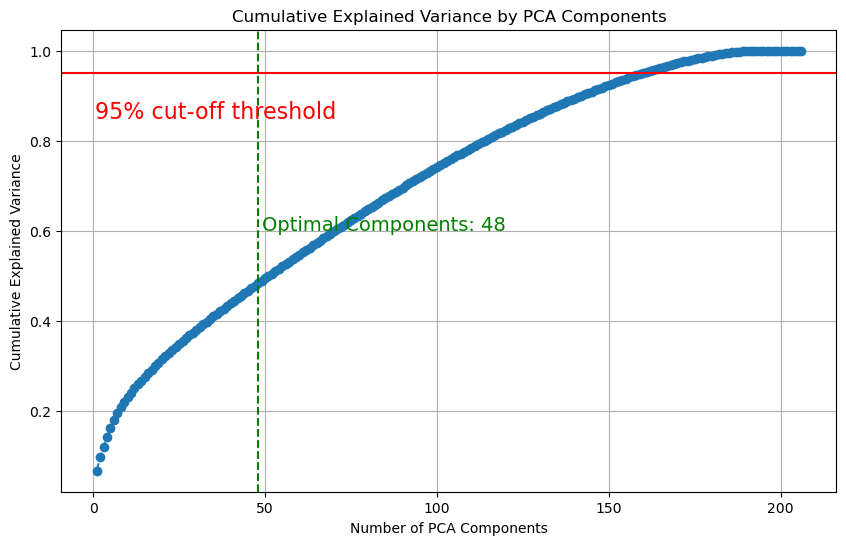

Optimal number of components:  48


In [45]:
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculating the cumulative explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the cumulative explained variance ratio to find the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% variance line for reference
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# Determining the number of components that explain at least 95% of the variance
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance >= 0.95]) + 1

# Highlighting the optimal number of components on the plot
plt.axvline(x=optimal_num_components, color='g', linestyle='--')
plt.text(optimal_num_components + 1, 0.6, f'Optimal Components: {optimal_num_components}', color = 'green', fontsize=14)

plt.show()

# Returning the optimal number of components
print("Optimal number of components: ", optimal_num_components)

In [46]:
pca = PCA(n_components=48)
pca_result = pca.fit_transform(X_scaled)

# Get the PCA loadings for 9 components
pca_components = pca.components_

# Analyze the PCA loadings to determine which features contribute most to each of the 9 principal components
# We will look at the absolute values of the loadings to assess their contribution
pca_loadings_analysis = pd.DataFrame(
    pca_components, 
    columns = X.columns, 
    index = [f'PC{i+1}' for i in range(48)]
).abs().T  # Transpose to have features as rows

# Sorting the loadings for each component to see the top contributing features
top_features_per_pc = pca_loadings_analysis.apply(lambda s: s.abs().nlargest(5).index.tolist(), axis=0)

top_features_per_pc

PC1                        PC2                       PC3  \
0           Refrigerator                   bedrooms                    toilet   
1  Dishes and silverware  Children’s books and toys              Wide doorway   
2         Cooking basics                 High chair             Wide entryway   
3           Coffee maker      Children’s dinnerware  Wide clearance to shower   
4                   Oven                       beds                      Oven   

                           PC4                                PC5  \
0         review_scores_rating                 host_response_rate   
1        review_scores_checkin   host_response_time_late response   
2       review_scores_accuracy  host_response_time_within an hour   
3  review_scores_communication          room_type_Entire home/apt   
4          review_scores_value             room_type_Private room   

                         PC6                       PC7  \
0  room_type_Entire home/apt   property_type_Apartment   
1     room_type_Private room  Free parking on premises   
2               cleaning_fee                      beds   
3             Changing table       property_type_House   
4                         TV              accommodates   

                                PC8                               PC9  \
0  host_response_time_late response                     Window guards   
1                host_response_rate                   Host greets you   
2                  24-hour check-in                         Hot water   
3                      accommodates  host_response_time_late response   
4                              beds                host_response_rate   

              PC10                       PC11  \
0    Self check-in              Self check-in   
1          Lockbox                    Lockbox   
2    Window guards                   Internet   
3  Host greets you   Buzzer/wireless intercom   
4   Building staff  room_type_Entire home/apt   

                               PC12  \
0                          Elevator   
1  host_response_time_late response   
2                host_response_rate   
3             Wheelchair accessible   
4      cancellation_policy_moderate   

                                              PC13  \
0                     cancellation_policy_moderate   
1                       Fixed grab bars for shower   
2                       Fixed grab bars for toilet   
3  cancellation_policy_strict_14_with_grace_period   
4                              property_type_House   

                         PC14                          PC15  \
0  Fixed grab bars for shower  cancellation_policy_flexible   
1  Fixed grab bars for toilet                         Dryer   
2                      toilet                        Washer   
3    Accessible-height toilet                     Hot water   
4         Free street parking               Host greets you   

                       PC16                                             PC17  \
0               Safety card                                      Lake access   
1  Accessible-height toilet                                       Beachfront   
2             First aid kit                                       Waterfront   
3                    toilet                                 Beach essentials   
4                  Elevator  neighbourhood_cleansed_IJburg - Zeeburgereiland   

                                              PC18  \
0                     cancellation_policy_moderate   
1  cancellation_policy_strict_14_with_grace_period   
2                                    First aid kit   
3                                   Smoke detector   
4                                      Safety card   

                           PC19                                   PC20  \
0    Fixed grab bars for toilet                            Pocket wifi   
1    Fixed grab bars for shower                    Ethernet connection   
2      Accessible-height toilet  host_response_time_within a few hour

### Looking at the top 5 features contributing to a particular principal component

In [48]:
# Function to get top n features for each principal component with their loadings
def get_top_features_loadings(pca_loadings, n_features):
    top_features = {}
    for i in range(pca_loadings.shape[0]):
        # Get the index of the n largest absolute values in the i-th principal component
        top_indices = np.argsort(np.abs(pca_loadings[i]))[-n_features:]
        # Create a dictionary of the top features and their loadings for the i-th principal component
        top_features[f'PC{i+1}'] = {X.columns[j]: pca_loadings[i][j] for j in top_indices}
    return top_features

# Get the top 5 features and their loadings for each of the 9 principal components
top_features_loadings = get_top_features_loadings(pca_components, 5)
top_features_loadings_df = pd.DataFrame(top_features_loadings).T

top_features_loadings_df

Oven  Coffee maker  Cooking basics  Dishes and silverware  \
PC1   0.208606      0.208842        0.211789               0.218539   
PC2        NaN           NaN             NaN                    NaN   
PC3  -0.174412           NaN             NaN                    NaN   
PC4        NaN           NaN             NaN                    NaN   
PC5        NaN           NaN             NaN                    NaN   
PC6        NaN           NaN             NaN                    NaN   
PC7        NaN           NaN             NaN                    NaN   
PC8        NaN           NaN             NaN                    NaN   
PC9        NaN           NaN             NaN                    NaN   
PC10       NaN           NaN             NaN                    NaN   
PC11       NaN           NaN             NaN                    NaN   
PC12       NaN           NaN             NaN                    NaN   
PC13       NaN           NaN             NaN                    NaN   
PC14       NaN           NaN             NaN                    NaN   
PC15       NaN           NaN             NaN                    NaN   
PC16       NaN           NaN             NaN                    NaN   
PC17       NaN           NaN             NaN                    NaN   
PC18       NaN           NaN             NaN                    NaN   
PC19       NaN           NaN             NaN                    NaN   
PC20       NaN           NaN             NaN                    NaN   
PC21       NaN           NaN             NaN                    NaN   
PC22       NaN           NaN             NaN                    NaN   
PC23       NaN           NaN             NaN                    NaN   
PC24       NaN           NaN             NaN                    NaN   
PC25       NaN           NaN             NaN                    NaN   
PC26       NaN           NaN             NaN                    NaN   
PC27       NaN           NaN             NaN                    NaN   
PC28       NaN           NaN             NaN                    NaN   
PC29       NaN           NaN             NaN                    NaN   
PC30       NaN           NaN             NaN                    NaN   
PC31       NaN           NaN             NaN                    NaN   
PC32       NaN           NaN             NaN                    NaN   
PC33       NaN           NaN             NaN                    NaN   
PC34       NaN           NaN             NaN                    NaN   
PC35       NaN           NaN             NaN                    NaN   
PC36       NaN           NaN             NaN                    NaN   
PC37       NaN           NaN             NaN                    NaN   
PC38       NaN           NaN             NaN                    NaN   
PC39       NaN           NaN             NaN                    NaN   
PC40       NaN           NaN             NaN                    NaN   
PC41       NaN           NaN             NaN                    NaN   
PC42       NaN           NaN             NaN                    NaN   
PC43       NaN           NaN             NaN                    NaN   
PC44       NaN           NaN             NaN                    NaN   
PC45       NaN           NaN             NaN                    NaN   
PC46       NaN           NaN             NaN                    NaN   
PC47       NaN           NaN             NaN                    NaN   
PC48       NaN           NaN             NaN                    NaN   

      Refrigerator      beds  Children’s dinnerware  High chair  \
PC1       0.218966       NaN                    NaN         NaN   
PC2            NaN  0.204966               0.212744    0.217506   
PC3            NaN       NaN                    NaN         NaN   
PC4            NaN       NaN                    NaN         NaN   
PC5            NaN       NaN                    NaN         NaN   
PC6            NaN       NaN                    NaN         NaN   
PC7            NaN  0.221931                    NaN         N

In [51]:
d = df[df.price>2000]
d.shape

(5, 207)

### There are only 207 airbnbs with a price higher than 2000. These couls introduce noise and may affect model training. Hence considering values lower than 2000

In [52]:
only_below_2000 = df[df.price <= 2000]
X = only_below_2000.drop(columns = ["price"])
y = only_below_2000.price

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# keep the first two principal components of the data
pca = PCA(n_components = 50) 

pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

In [55]:
print(f'Mean Squared Error(Test): {mse}')
print(f'R-squared(Test): {r2}')

Mean Squared Error(Test): 4373.3012127954
R-squared(Test): 0.44138159993683534


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

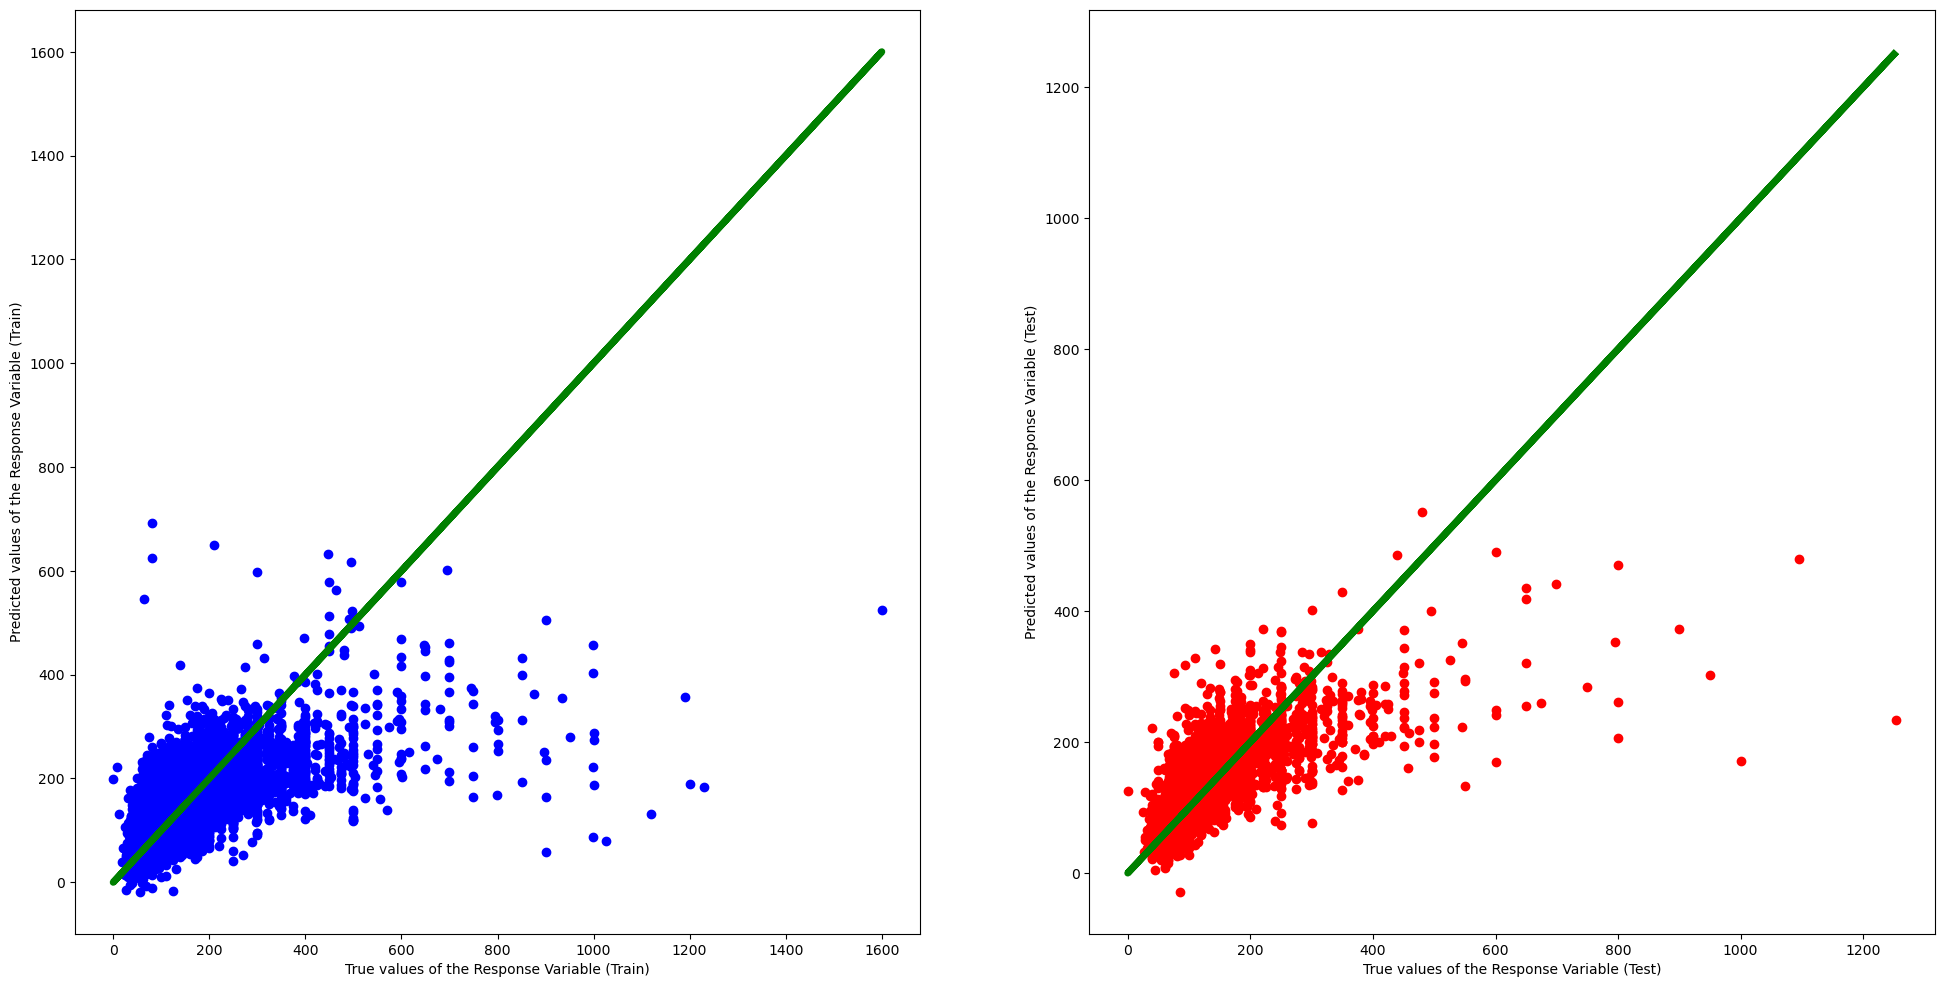

In [57]:
train_pred = model.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_pred, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

# Trying out feature selection 

In [58]:
only_below_2000 = df[df.price<2000]
X = only_below_2000.drop(columns = ["price"])
y = only_below_2000.price

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

best_n_features = None
best_score = -float('inf')
k = [43, 75, 100, 150]
for n_features in k:
    # Select top n features
    selector = SelectKBest(score_func=f_regression, k=n_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Define the RandomForestRegressor
    rf_regressor = RandomForestRegressor(random_state=42)
    
    # Fit the model
    rf_regressor.fit(X_train_selected, y_train)
    
    # Transform the test set
    X_test_selected = selector.transform(X_test)
    
    # Make predictions on the test set
    y_pred = rf_regressor.predict(X_test_selected)
    
    # Calculate the score
    score = r2_score(y_test, y_pred)
    
    # Update the best score and number of features
    if score > best_score:
        best_score = score
        best_n_features = n_features

# Select the best number of features
selector = SelectKBest(score_func=f_regression, k=best_n_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [59]:
model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f'Mean Squared Error(Test): {mse}')
print(f'R-squared(Test): {r2}')

Mean Squared Error(Test): 4393.553184640737
R-squared(Test): 0.46472832279977827


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

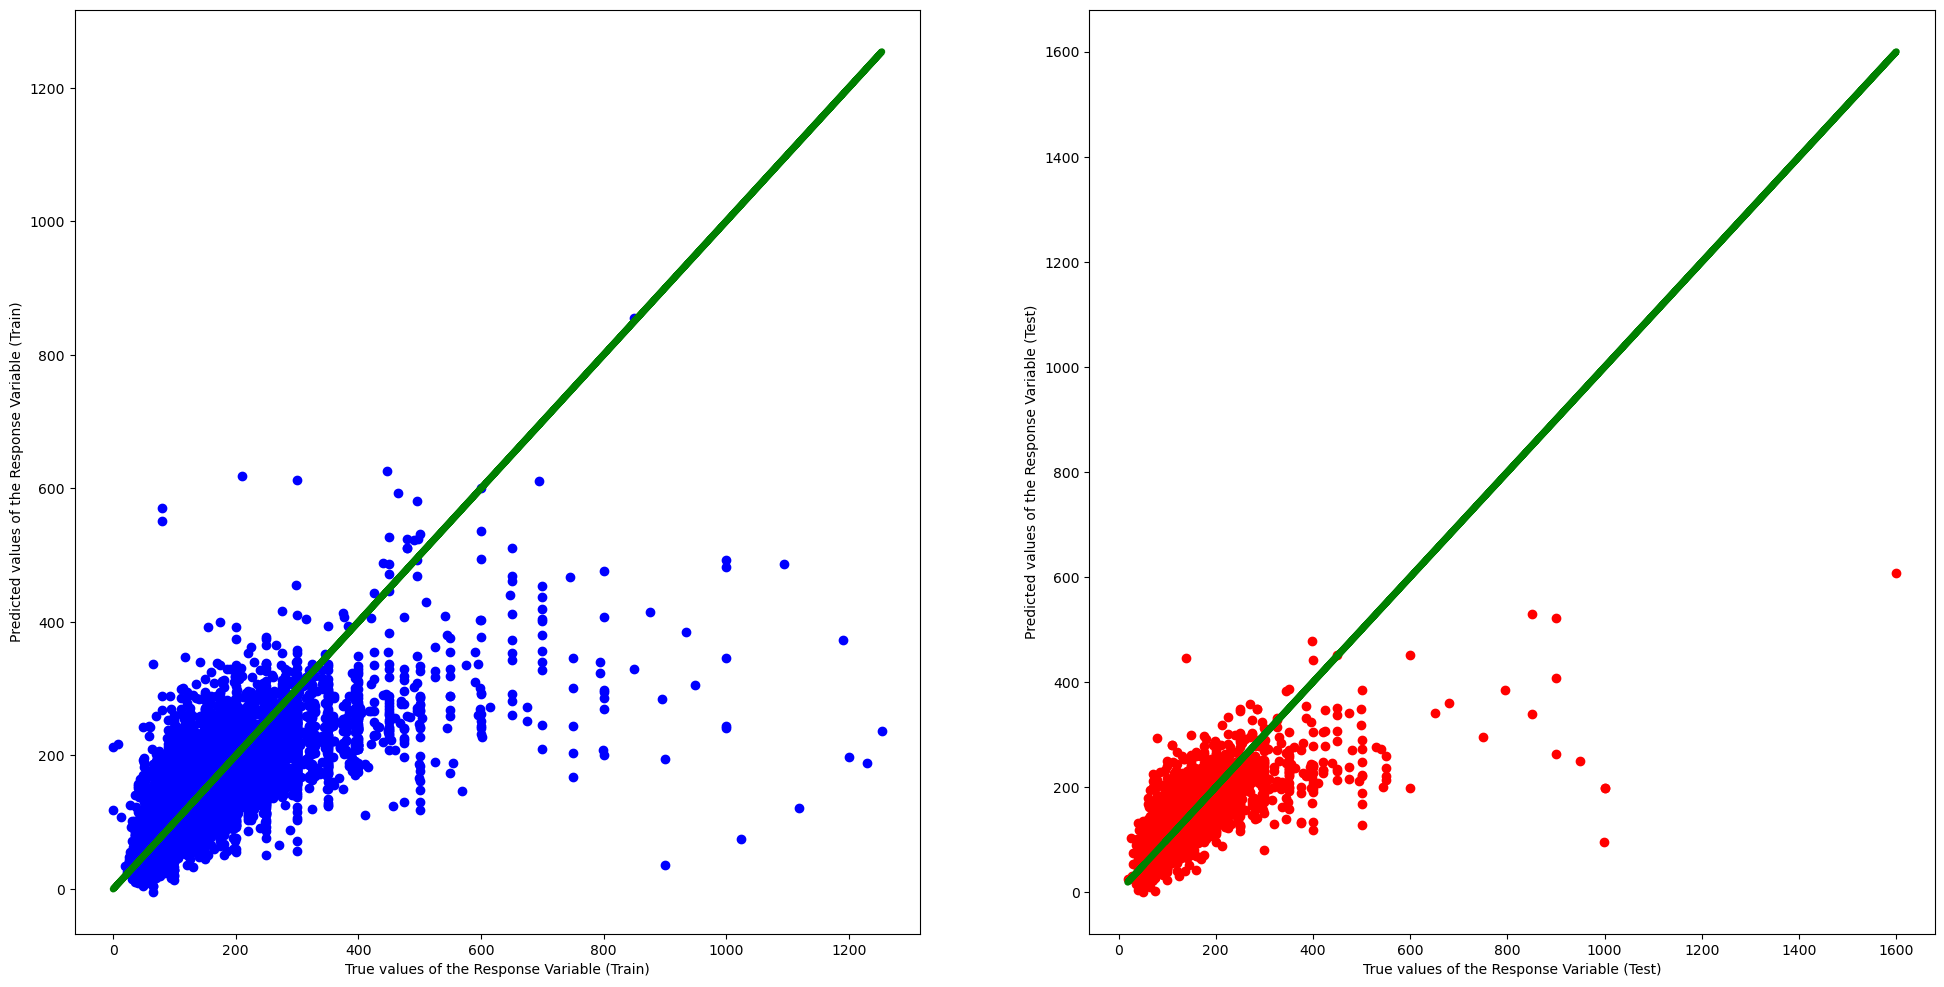

In [61]:
train_pred = model.predict(X_train_selected)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_pred, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Feature selection using SelectKBestFeatures works better than dimensionality reduction

### Number of features used: 150

Hence using selectkbest features transformed data for further model training

## Trying out models

## Ridge Regression

In [62]:
# Define the Ridge regression model
ridge = Ridge()

# Define the hyperparameters grid
param_grid_ridge = {
    'alpha': [0.1, 1, 10],
    'solver': ['svd', 'cholesky', 'lsqr', 'saga']
}

# Create the GridSearchCV object
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2)

# Perform GridSearchCV
grid_search_ridge.fit(X_train_selected, y_train)

# Get the best model from GridSearchCV
best_ridge = grid_search_ridge.best_estimator_

# Make predictions on the test set
y_pred_ridge = best_ridge.predict(X_test_selected)
y_pred_train_ridge = best_ridge.predict(X_train_selected) 

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)  
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)  

# Print evaluation metrics
print(f'Mean Squared Error(Test): {mse_ridge}')
print(f'R-squared(Test): {r2_ridge}')
print(f'Mean Squared Error(Train): {mse_train_ridge}')
print(f'R-squared(Train): {r2_train_ridge}')
print("Best Parameters:", grid_search_ridge.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean Squared Error(Test): 4395.608677166167
R-squared(Test): 0.4644778997628146
Mean Squared Error(Train): 4098.293520203399
R-squared(Train): 0.46481294597718503
Best Parameters: {'alpha': 10, 'solver': 'lsqr'}


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

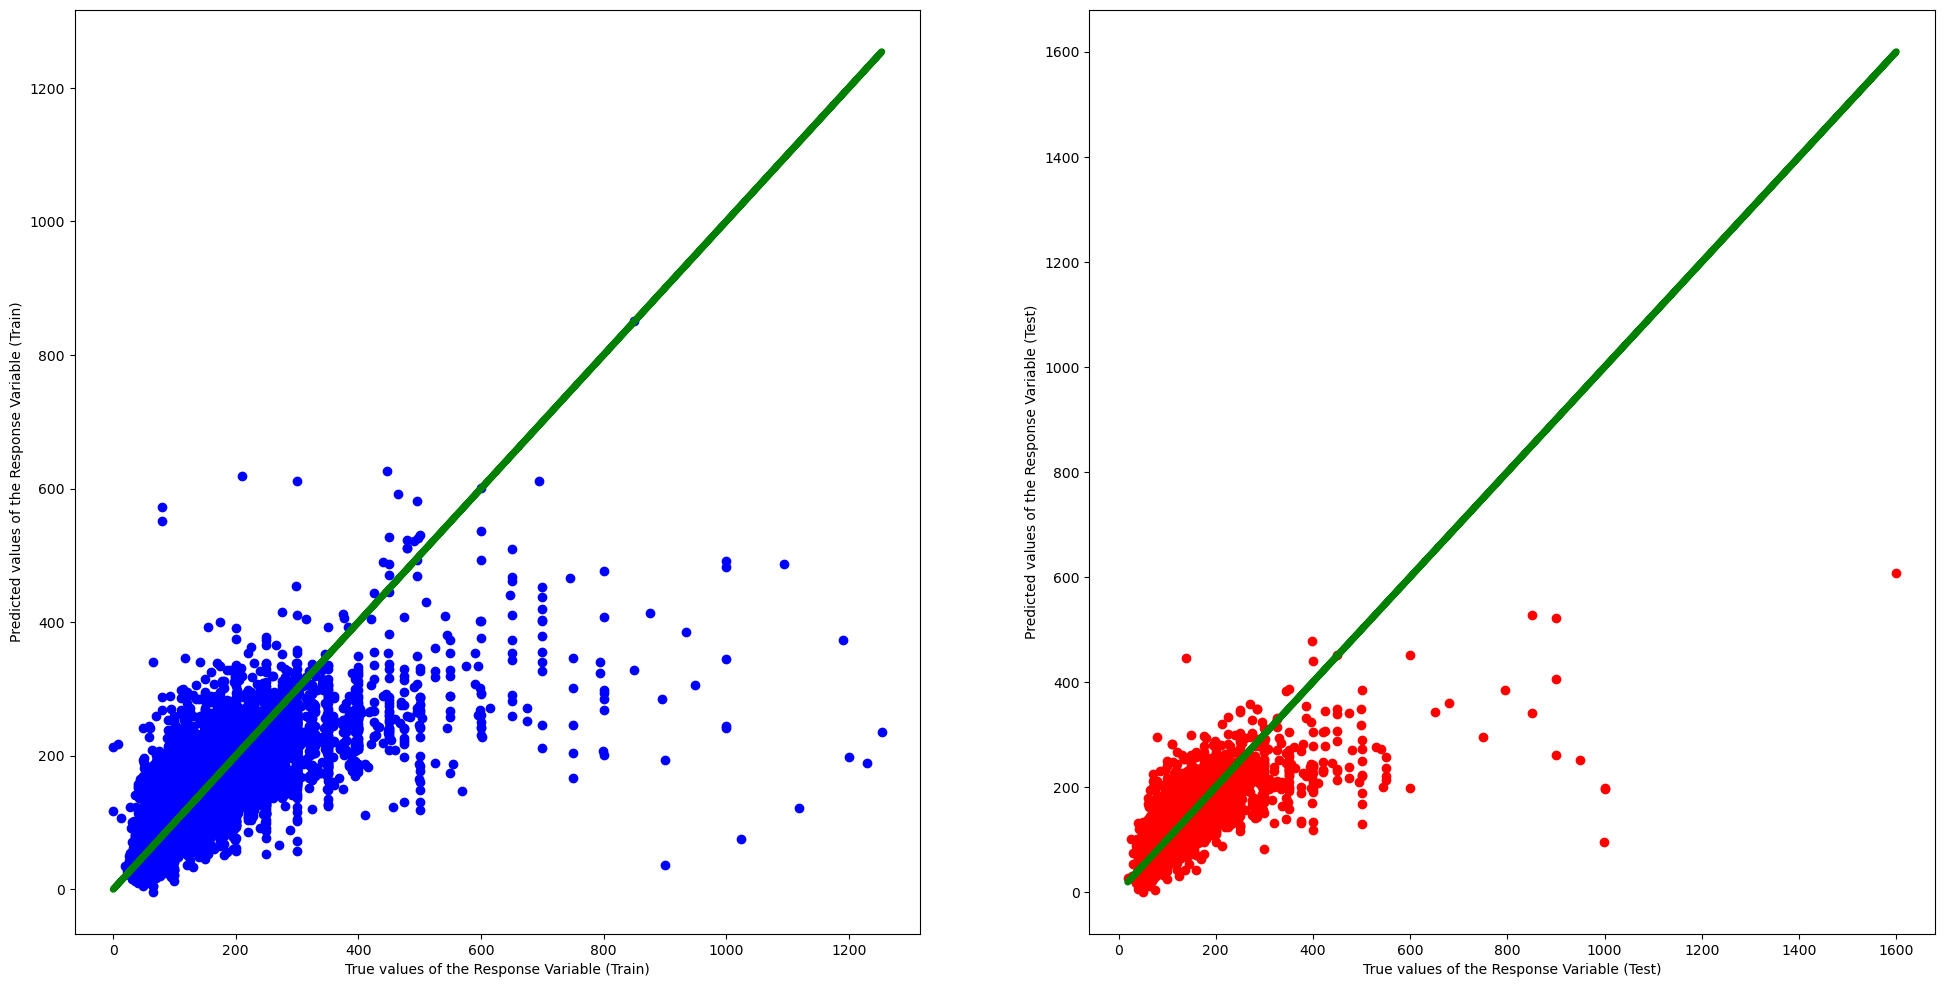

In [63]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_pred_train_ridge, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_pred_ridge, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Lasso Regression

In [67]:
lasso = Lasso()

param_grid_lasso = {
    'alpha': [0.1, 1, 10],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, n_jobs=-1, verbose=2)

grid_search_lasso.fit(X_train_selected, y_train)

best_lasso = grid_search_lasso.best_estimator_

# Make predictions on the test set
y_pred_lasso = best_lasso.predict(X_test_selected)
y_pred_train_lasso = best_lasso.predict(X_train_selected)  

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)  
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)  

# Print evaluation metrics
print(f'Mean Squared Error(Test): {mse_lasso}')
print(f'R-squared(Test): {r2_lasso}')
print(f'Mean Squared Error(Train): {mse_train_lasso}')
print(f'R-squared(Train): {r2_train_lasso}')
print("Best Parameters:", grid_search_lasso.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean Squared Error(Test): 4473.220711218407
R-squared(Test): 0.4550223356915081
Mean Squared Error(Train): 4202.887454069558
R-squared(Train): 0.4511542563156138
Best Parameters: {'alpha': 1, 'tol': 0.01}


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

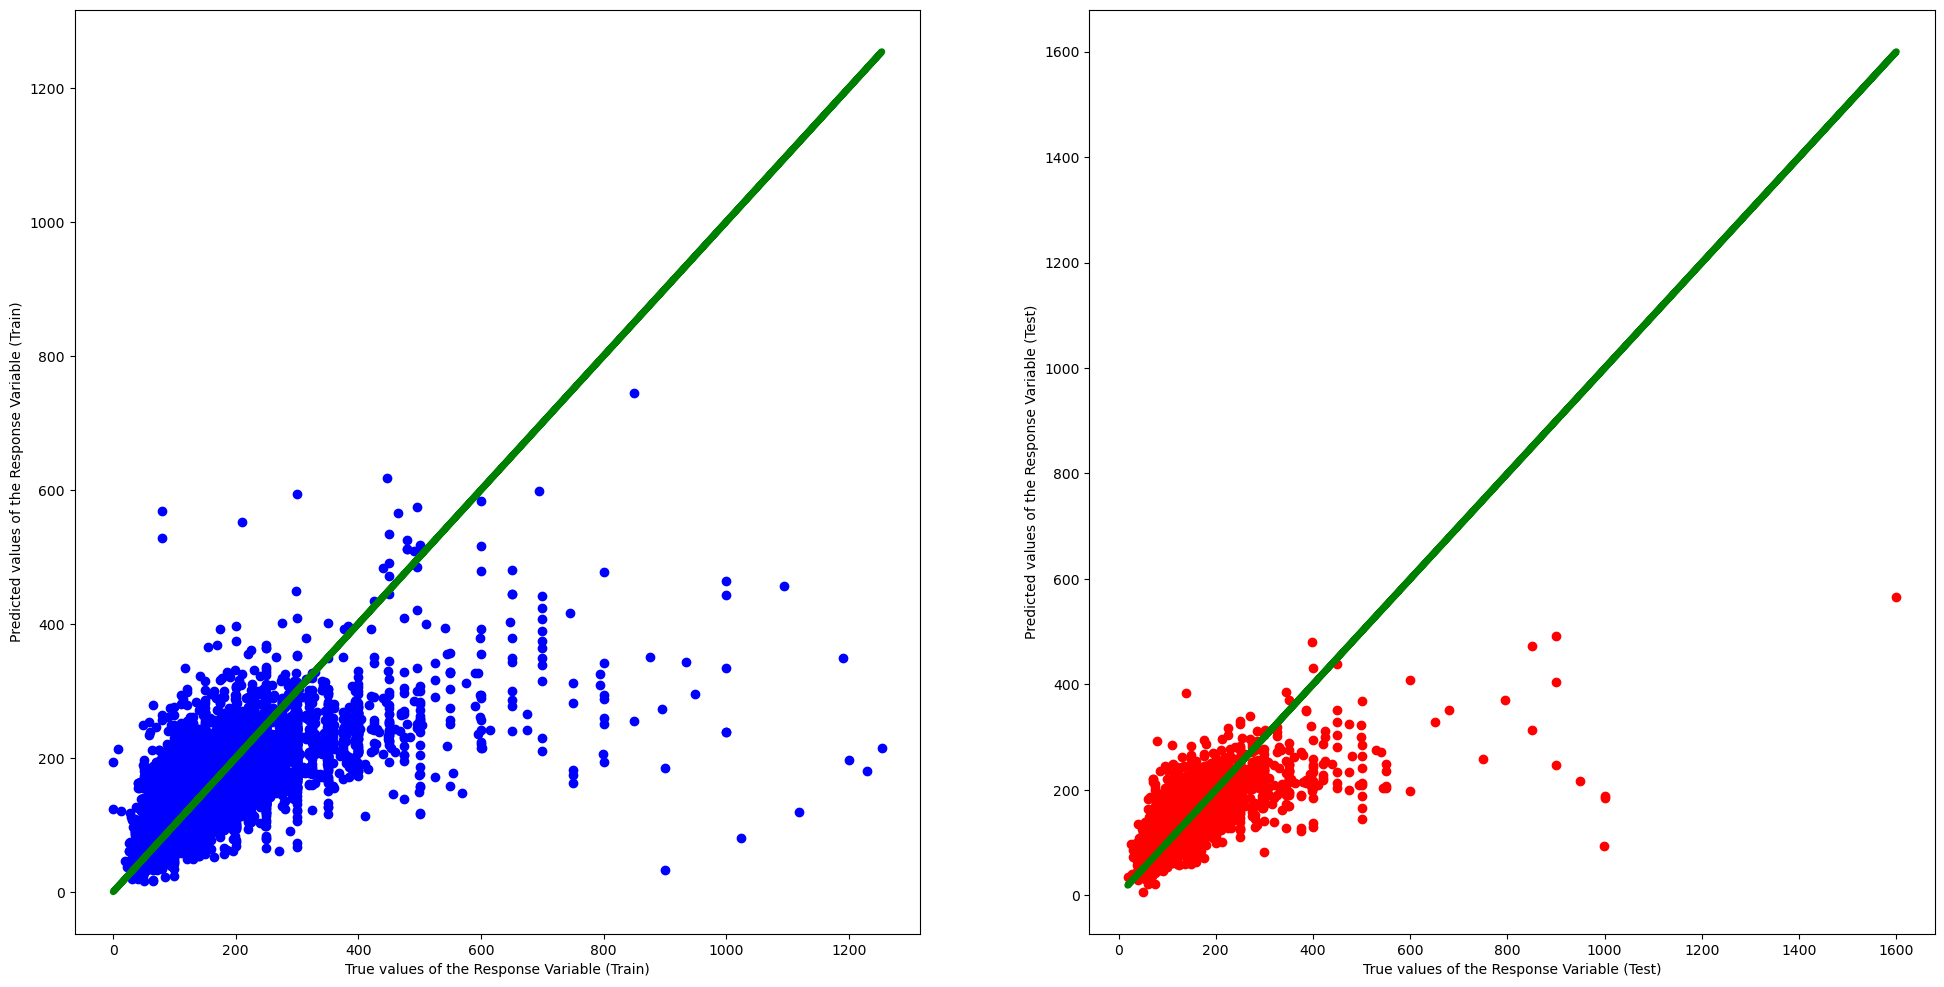

In [68]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_pred_train_lasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_pred_lasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Bagging

In [69]:
# Create a base model
base_model = DecisionTreeRegressor()

# Create a BaggingRegressor
bg_reg = BaggingRegressor(estimator=base_model, random_state=42)


param_grid_bg = {
    'n_estimators': [100, 200, 500],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

grid_search_bg = GridSearchCV(estimator = bg_reg, param_grid = param_grid_bg, cv=5, n_jobs=-1)

grid_search_bg.fit(X_train_selected, y_train)

best_bg_reg = grid_search_bg.best_estimator_

# Prediction
train_prediction_best_bg = best_bg_reg.predict(X_train_selected)
test_prediction_best_bg = best_bg_reg.predict(X_test_selected)

# Print evaluation metrics
mse_train_best_bg = mean_squared_error(y_train, train_prediction_best_bg)
r2_train_best_bg = r2_score(y_train, train_prediction_best_bg)
mse_test_best_bg = mean_squared_error(y_test, test_prediction_best_bg)
r2_test_best_bg = r2_score(y_test, test_prediction_best_bg)

print("Best Parameters:", grid_search_bg.best_params_)
print("Train MSE:", mse_train_best_bg)
print("Train R-squared:", r2_train_best_bg)
print("Test MSE:", mse_test_best_bg)
print("Test R-squared:", r2_test_best_bg)

Best Parameters: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 100}
Train MSE: 539.9690535161457
Train R-squared: 0.9294866398440755
Test MSE: 4036.0221741228447
Test R-squared: 0.5082867402374066


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

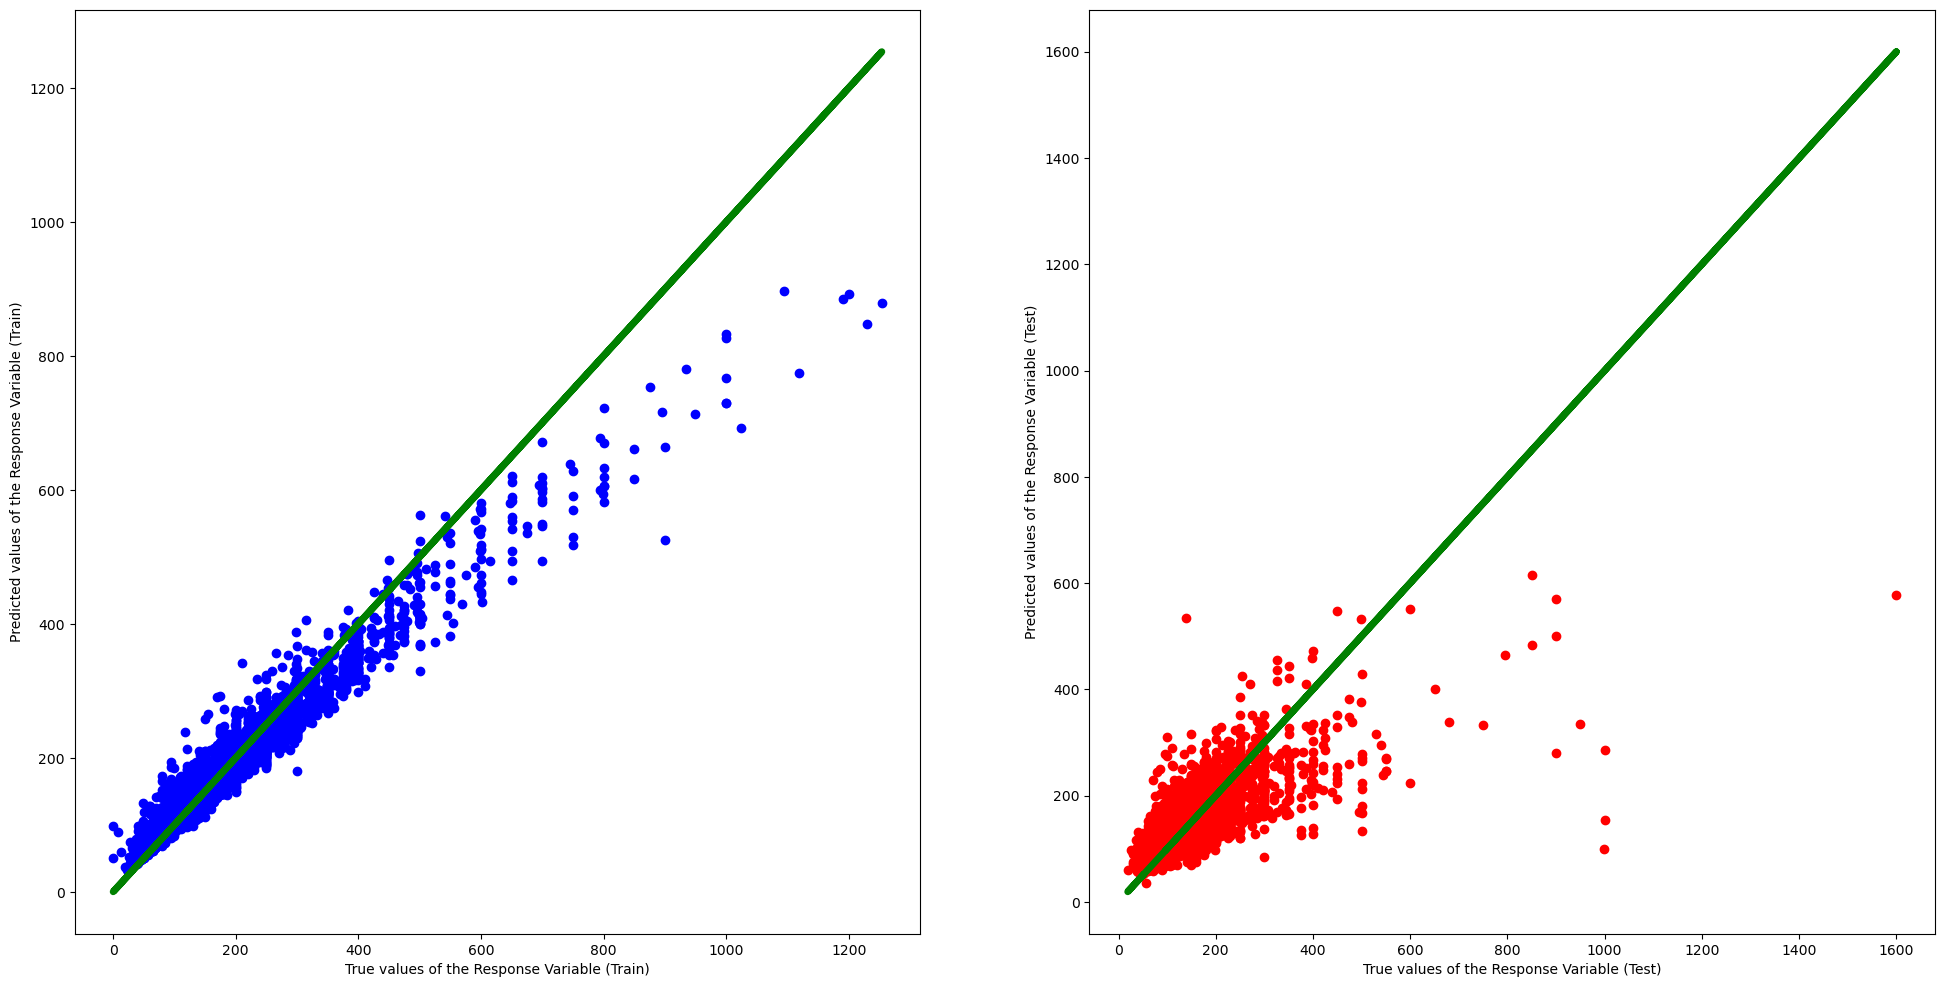

In [70]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_prediction_best_bg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, test_prediction_best_bg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Random Forest

In [75]:
rf_regressor = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV

param_grid_rf = {
   'n_estimators': [100, 150, 200],
   'max_depth': [None, 5, 10, 15],
   'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_selected, y_train)

best_rf_regressor = grid_search_rf.best_estimator_

y_pred_rf = best_rf_regressor.predict(X_test_selected)
y_train_pred_rf = best_rf_regressor.predict(X_train_selected)

mse_pred_rf = mean_squared_error(y_test, y_pred_rf )
r2_pred_rf = r2_score(y_test, y_pred_rf)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf )
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print("Best Parameters:", grid_search_rf.best_params_)
print("Train R-squared:", r2_train_rf)
print("Train MSE:", mse_train_rf)
print("Test MSE:", mse_pred_rf)
print("Test R-squared:", r2_pred_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Train R-squared: 0.6363207468657819
Train MSE: 2784.9409199065562
Test MSE: 4210.268781195726
Test R-squared: 0.4870580741226078


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

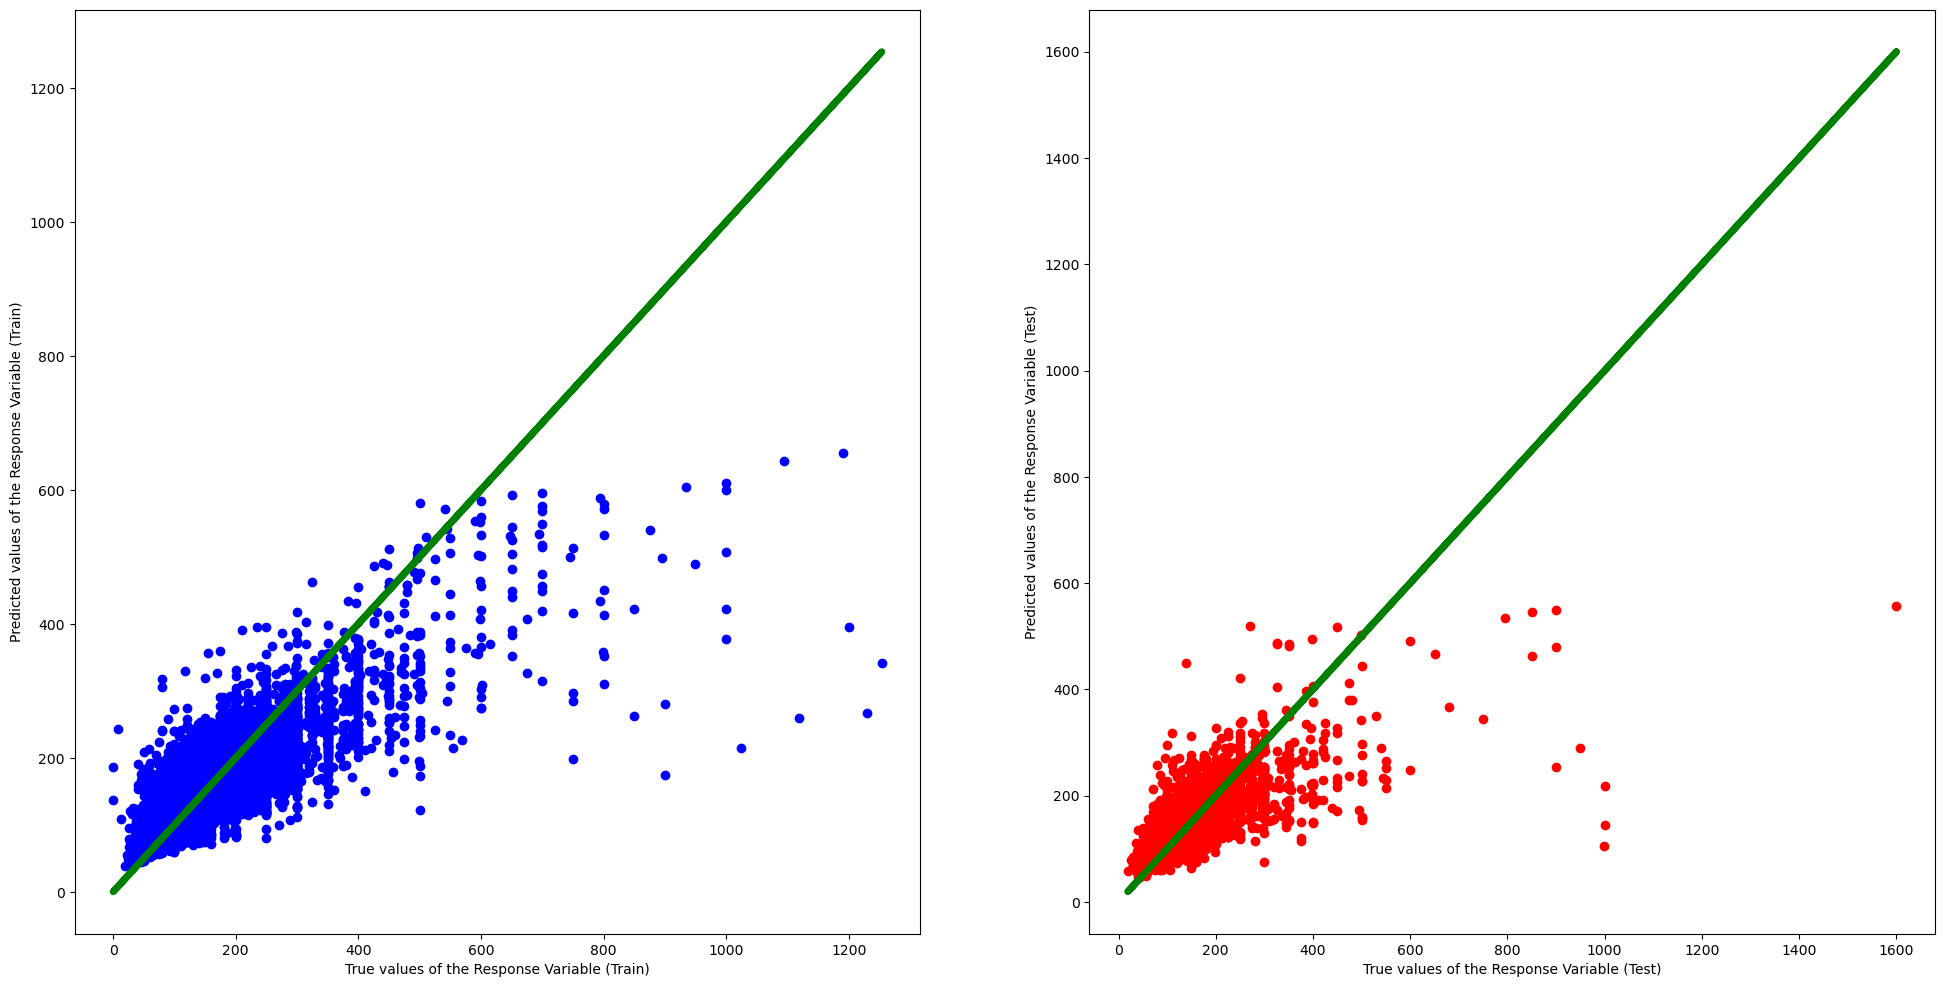

In [78]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred_rf, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_pred_rf, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Gradient Boosting

In [80]:
gb_reg = GradientBoostingRegressor()
                
   
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9],
    'alpha': [0.1, 0.01, 0.001]
}

grid_search_gb = GridSearchCV(estimator = gb_reg, param_grid = param_grid_gb, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train_selected, y_train)

best_gb_reg = grid_search_gb.best_estimator_

train_prediction_best_gb = best_gb_reg.predict(X_train_selected)
test_prediction_best_gb = best_gb_reg.predict(X_test_selected)

mse_train_best_gb = mean_squared_error(y_train, train_prediction_best_gb)
r2_train_best_gb = r2_score(y_train, train_prediction_best_gb)
mse_test_best_gb = mean_squared_error(y_test, test_prediction_best_gb)
r2_test_best_gb = r2_score(y_test, test_prediction_best_gb)

print("Best Parameters:", grid_search_gb.best_params_)
print("Train MSE:", mse_train_best_gb)
print("Train R-squared:", r2_train_best_gb)
print("Test MSE:", mse_test_best_gb)
print("Test R-squared:", r2_test_best_gb)

Best Parameters: {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Train MSE: 2881.0672429518836
Train R-squared: 0.6237678237061637
Test MSE: 4050.3007694529424
Test R-squared: 0.5065471624175402


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

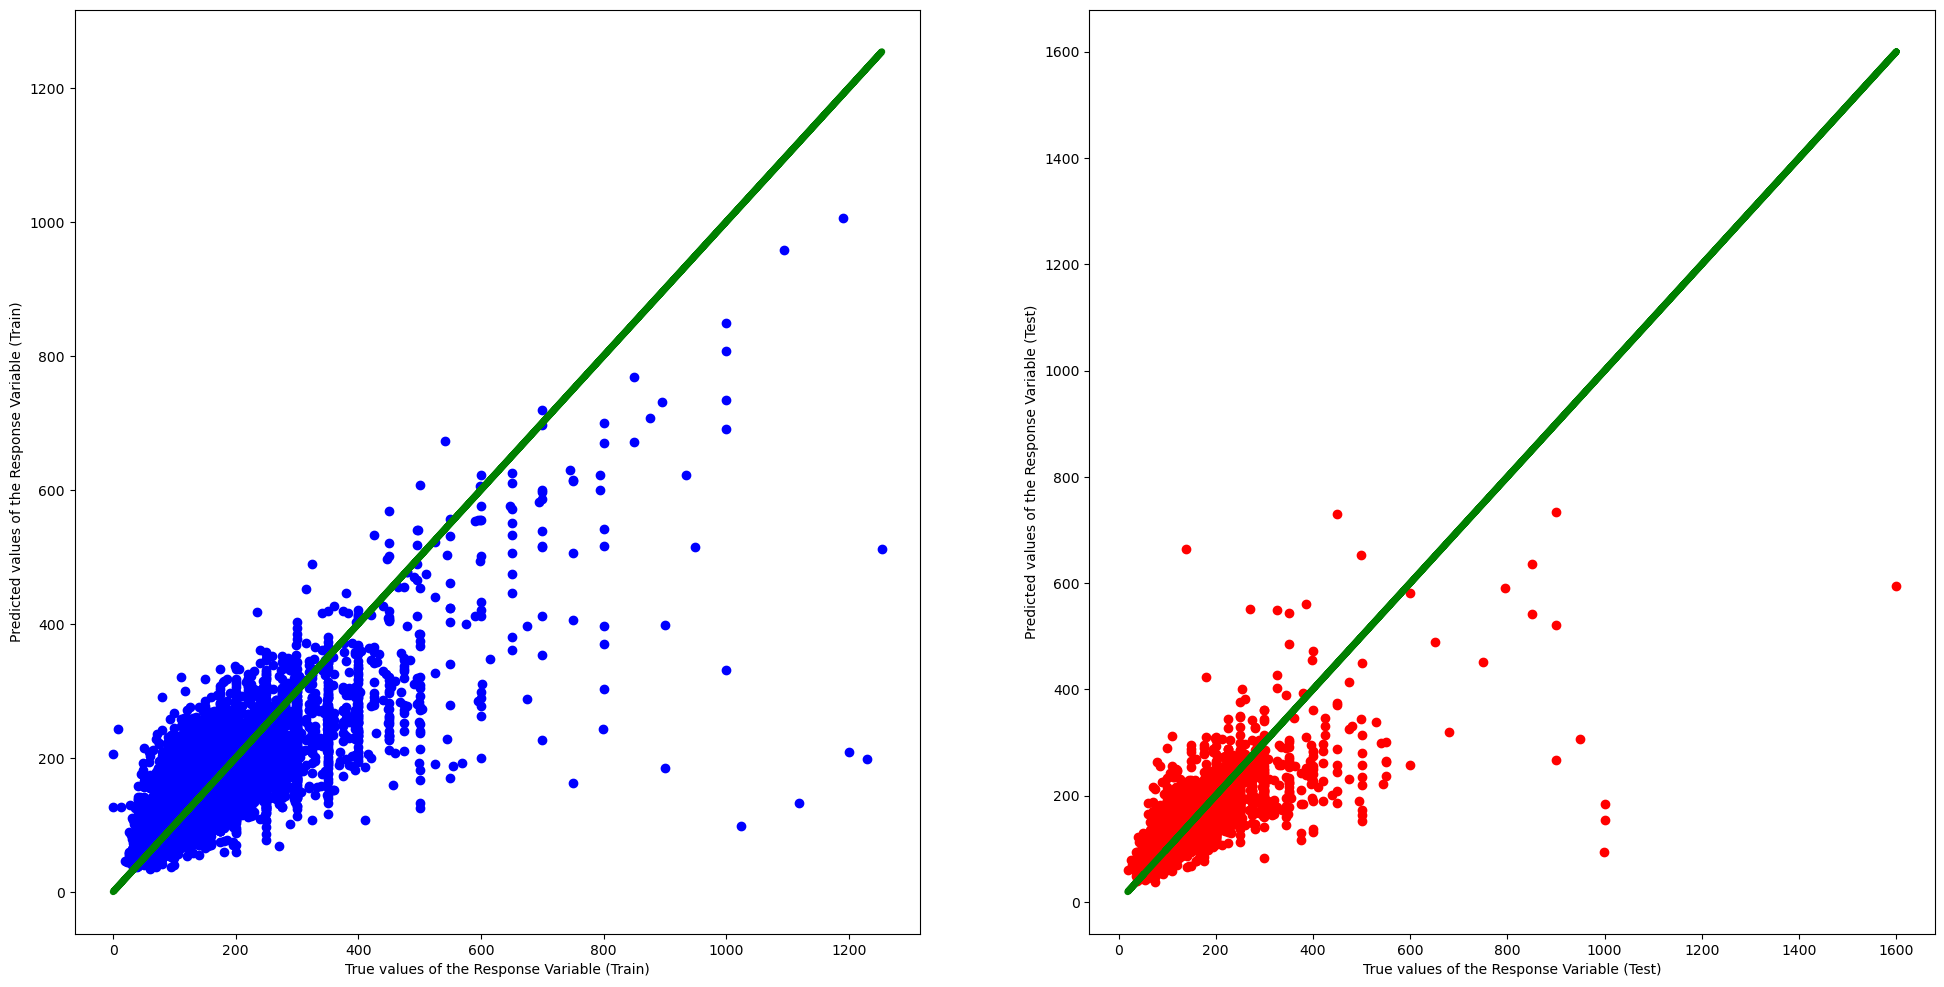

In [81]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_prediction_best_gb, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, test_prediction_best_gb, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Extreme Gradient Boosting

In [83]:
xgb_reg = xgb.XGBRegressor()

param_grid = {
    'colsample_bytree': [0.3, 0.6, 0.9],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9],
    'alpha': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 500]
}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_xgb_reg = grid_search.best_estimator_

train_prediction_best = best_xgb_reg.predict(X_train_selected)
test_prediction_best = best_xgb_reg.predict(X_test_selected)

mse_train_best = mean_squared_error(y_train, train_prediction_best)
r2_train_best = r2_score(y_train, train_prediction_best)
mse_test_best = mean_squared_error(y_test, test_prediction_best)
r2_test_best = r2_score(y_test, test_prediction_best)

print("Best Parameters:", grid_search.best_params_)
print("Train MSE:", mse_train_best)
print("Train R-squared:", r2_train_best)
print("Test MSE:", mse_test_best)
print("Test R-squared:", r2_test_best)

Best Parameters: {'alpha': 0.1, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Train MSE: 1686.7790477848107
Train R-squared: 0.7797272682102675
Test MSE: 3747.523338188045
Test R-squared: 0.5434348878280586


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

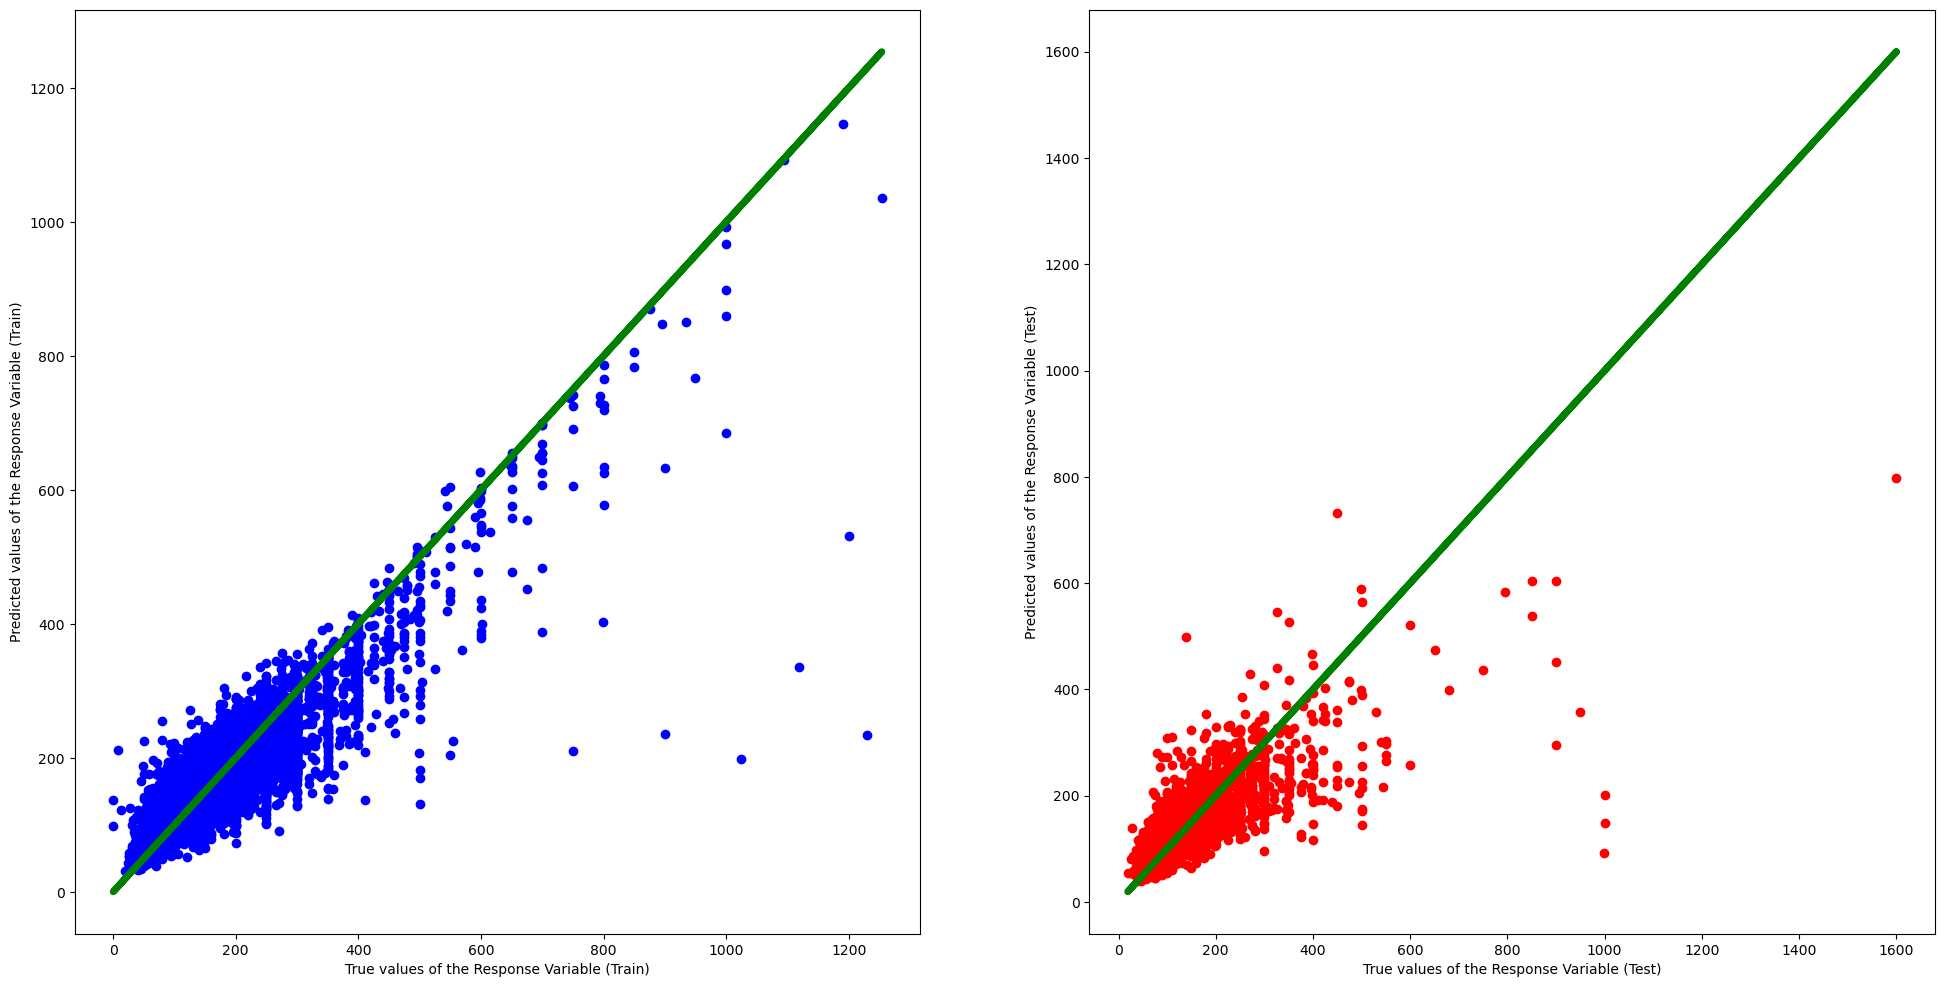

In [84]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_prediction_best, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, test_prediction_best, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### ANN

In [85]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_selected, y_train, epochs=10, batch_size=32)

y_pred_mlp = model.predict(X_test_selected)
y_train_mlp = model.predict(X_train_selected)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mse_train_mlp = mean_squared_error(y_train, y_train_mlp)
r2_train_mlp = r2_score(y_train, y_train_mlp)

print(f'Mean Squared Error(Test): {mse_mlp}')
print(f'R-squared(Test): {r2_mlp}')
print(f'Mean Squared Error(Train): {mse_train_mlp}')
print(f'R-squared(Train): {r2_train_mlp}')


Epoch 1/10
434/434 [==============================] - 0s 359us/step - loss: 8078.9600
Epoch 2/10
434/434 [==============================] - 0s 367us/step - loss: 4340.4536
Epoch 3/10
434/434 [==============================] - 0s 362us/step - loss: 4022.4165
Epoch 4/10
434/434 [==============================] - 0s 358us/step - loss: 3889.8730
Epoch 5/10
434/434 [==============================] - 0s 365us/step - loss: 3761.5720
Epoch 6/10
434/434 [==============================] - 0s 366us/step - loss: 3645.5171
Epoch 7/10
434/434 [==============================] - 0s 360us/step - loss: 3558.8491
Epoch 8/10
434/434 [==============================] - 0s 363us/step - loss: 3482.7581
Epoch 9/10
434/434 [==============================] - 0s 358us/step - loss: 3413.3567
Epoch 10/10
434/434 [==============================] - 0s 250us/step
Mean Squared Error(Test): 4267.093899945101
R-squared(Test): 0.4801350040374628
Mean Squared Error(Train): 3216.2724794607598
R-squared(Train): 0.57999411590

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

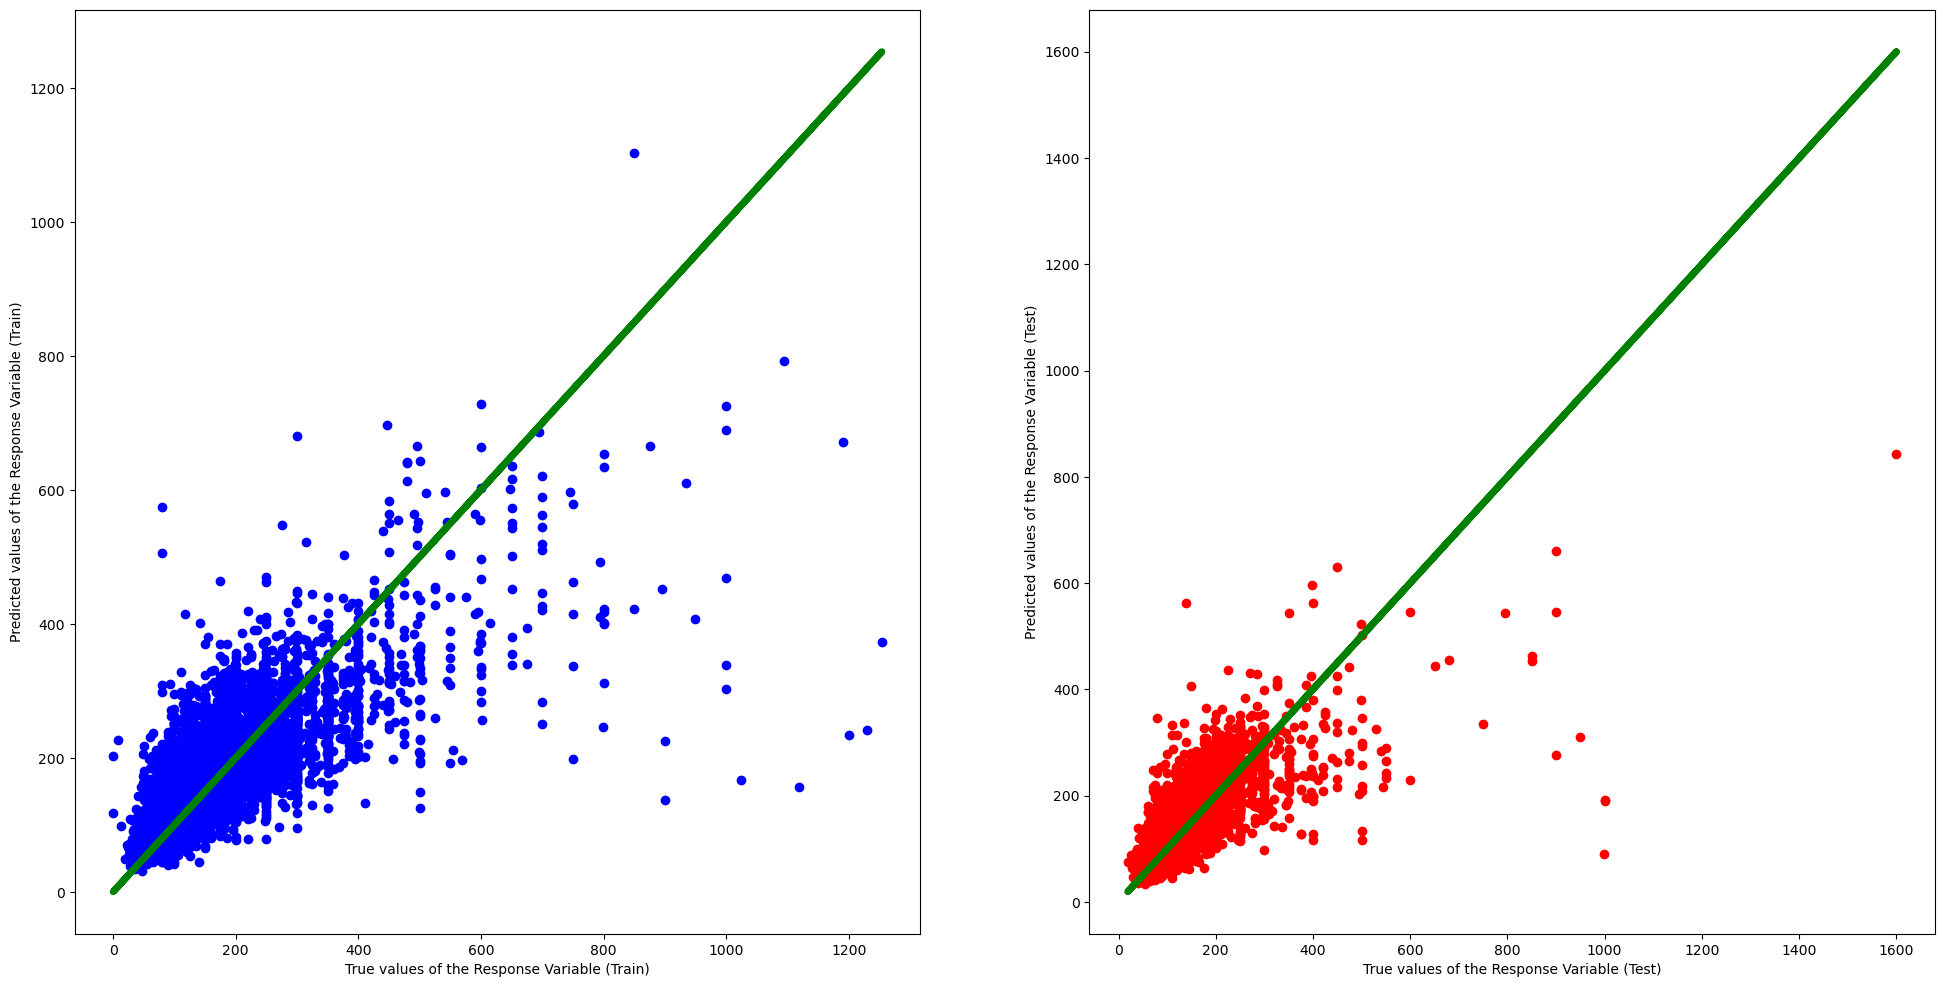

In [86]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_mlp, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_pred_mlp, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Adding Batch Normalization and Early Stopping

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)))
model.add(BatchNormalization())  # Add BatchNormalization layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  
model.add(Dense(1))  

early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Monitor validation loss and stop training if it doesn't improve for 3 epochs

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_selected, y_train, epochs=5, batch_size=32, validation_data=(X_test_selected, y_test), callbacks=[early_stopping])

y_pred_mlp_bn = model.predict(X_test_selected)
y_train_mlp_bn = model.predict(X_train_selected)

mse_mlp = mean_squared_error(y_test, y_pred_mlp_bn)
r2_mlp = r2_score(y_test, y_pred_mlp_bn)
mse_train_mlp = mean_squared_error(y_train, y_train_mlp_bn)
r2_train_mlp = r2_score(y_train, y_train_mlp_bn)

print(f'Mean Squared Error(Test): {mse_mlp}')
print(f'R-squared(Test): {r2_mlp}')
print(f'Mean Squared Error(Train): {mse_train_mlp}')
print(f'R-squared(Train): {r2_train_mlp}')

Epoch 1/5
434/434 [==============================] - 1s 617us/step - loss: 24936.7871 - val_loss: 21494.5605
Epoch 2/5
434/434 [==============================] - 0s 529us/step - loss: 14214.2061 - val_loss: 8739.6436
Epoch 3/5
434/434 [==============================] - 0s 520us/step - loss: 6082.6367 - val_loss: 4599.0181
Epoch 4/5
434/434 [==============================] - 0s 530us/step - loss: 3685.0984 - val_loss: 4217.6055
Epoch 5/5
434/434 [==============================] - 0s 241us/step
Mean Squared Error(Test): 4133.671285591281
R-squared(Test): 0.4963900357988337
Mean Squared Error(Train): 3466.444868633994
R-squared(Train): 0.5473246589022601


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

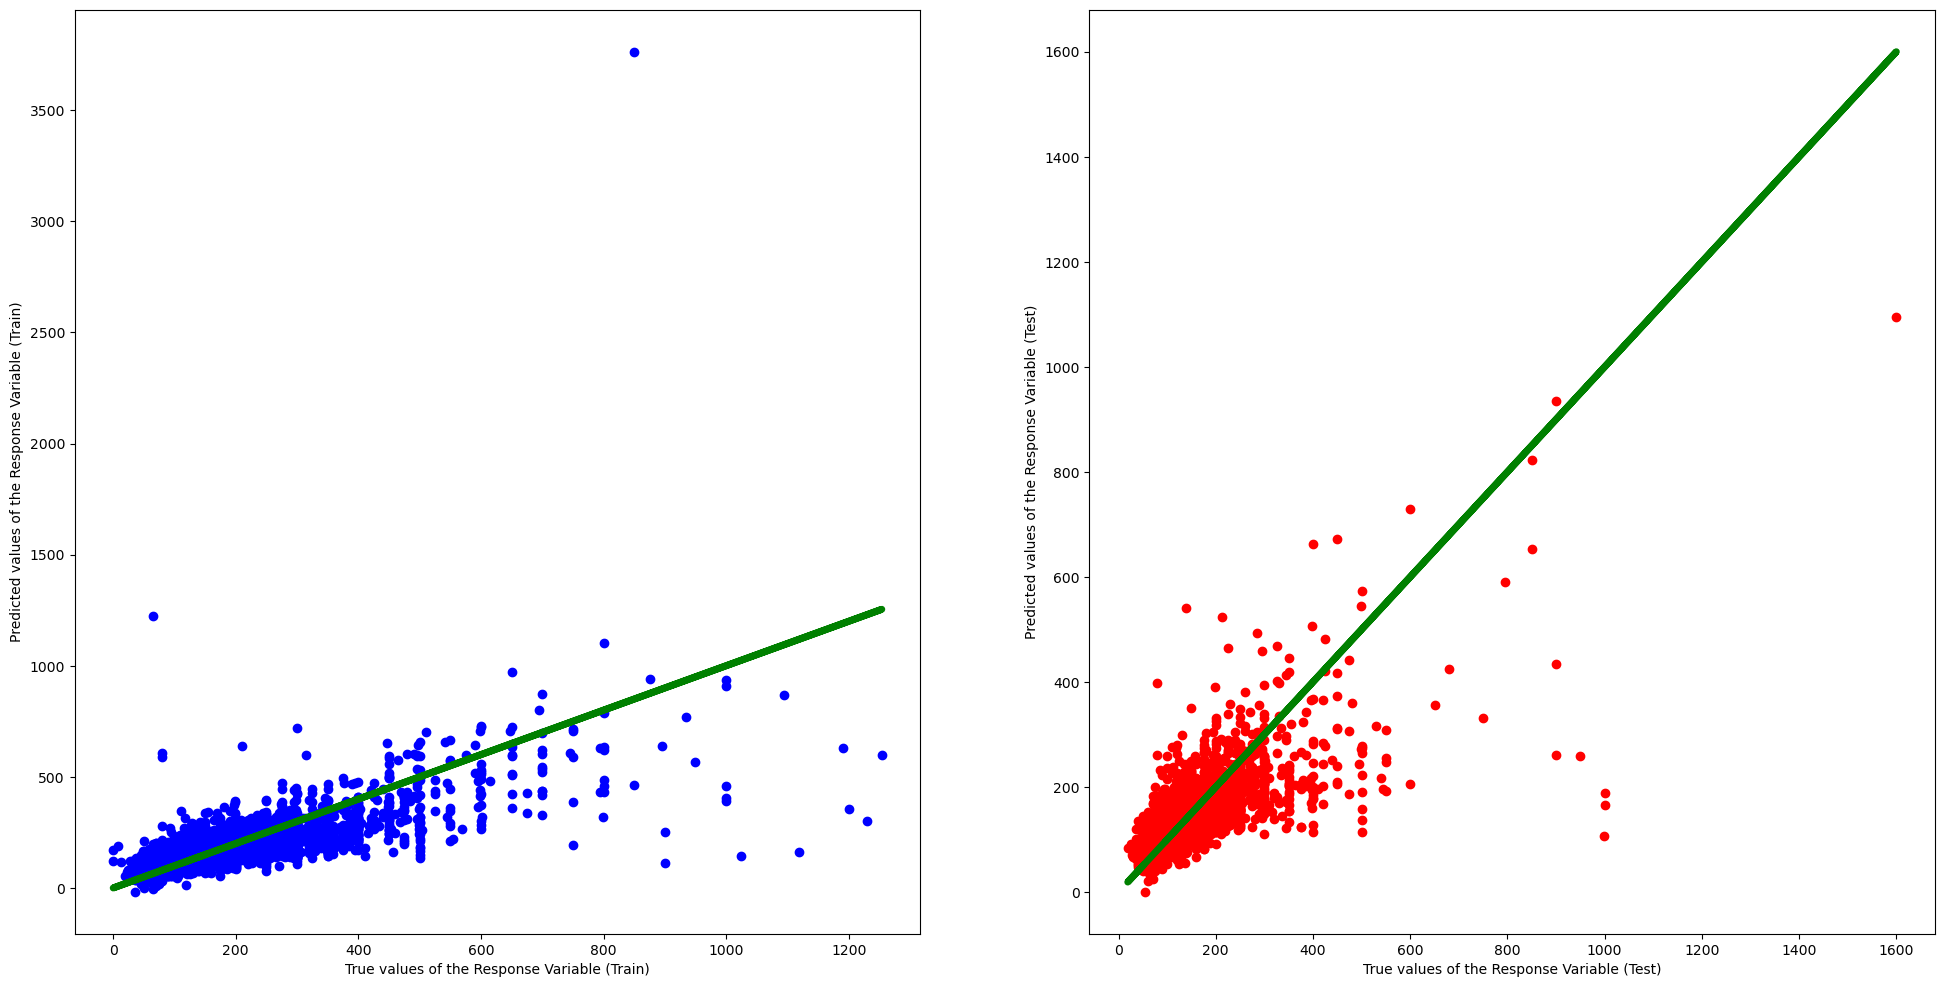

In [94]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_mlp_bn, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_pred_mlp_bn, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Adding Dropout

In [98]:
model_with_dropout = Sequential()
model_with_dropout.add(Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)))
model_with_dropout.add(Dropout(0.2))  # Add dropout with rate 0.2
model_with_dropout.add(Dense(64, activation='relu'))
model_with_dropout.add(Dropout(0.2))  # Add dropout with rate 0.2
model_with_dropout.add(Dense(1))  # Output layer with 1 neuron for regression
model_with_dropout.compile(optimizer='adam', loss='mean_squared_error')

model_with_dropout.fit(X_train_selected, y_train, epochs=10, batch_size=32)

y_pred_with_dropout = model_with_dropout.predict(X_test_selected)
y_train_with_dropout = model_with_dropout.predict(X_train_selected)

mse_with_dropout = mean_squared_error(y_test, y_pred_with_dropout)
r2_with_dropout = r2_score(y_test, y_pred_with_dropout)
mse_train_with_dropout = mean_squared_error(y_train, y_train_with_dropout)
r2_train_with_dropout = r2_score(y_train, y_train_with_dropout)

print(f'Mean Squared Error(Test): {mse_with_dropout}')
print(f'R-squared(Test): {r2_with_dropout}')
print(f'Mean Squared Error(Train): {mse_train_with_dropout}')
print(f'R-squared(Train): {r2_train_with_dropout}')

Epoch 1/10
434/434 [==============================] - 0s 418us/step - loss: 8538.6416
Epoch 2/10
434/434 [==============================] - 0s 427us/step - loss: 4683.4741
Epoch 3/10
434/434 [==============================] - 0s 407us/step - loss: 4461.8970
Epoch 4/10
434/434 [==============================] - 0s 399us/step - loss: 4321.8955
Epoch 5/10
434/434 [==============================] - 0s 401us/step - loss: 4124.8271
Epoch 6/10
434/434 [==============================] - 0s 418us/step - loss: 4069.1895
Epoch 7/10
434/434 [==============================] - 0s 401us/step - loss: 3959.8953
Epoch 8/10
434/434 [==============================] - 0s 393us/step - loss: 3855.8596
Epoch 9/10
434/434 [==============================] - 0s 394us/step - loss: 3842.1960
Epoch 10/10
434/434 [==============================] - 0s 255us/step
Mean Squared Error(Test): 4223.144011123643
R-squared(Test): 0.485489469936377
Mean Squared Error(Train): 3285.480882961196
R-squared(Train): 0.5709563441144

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

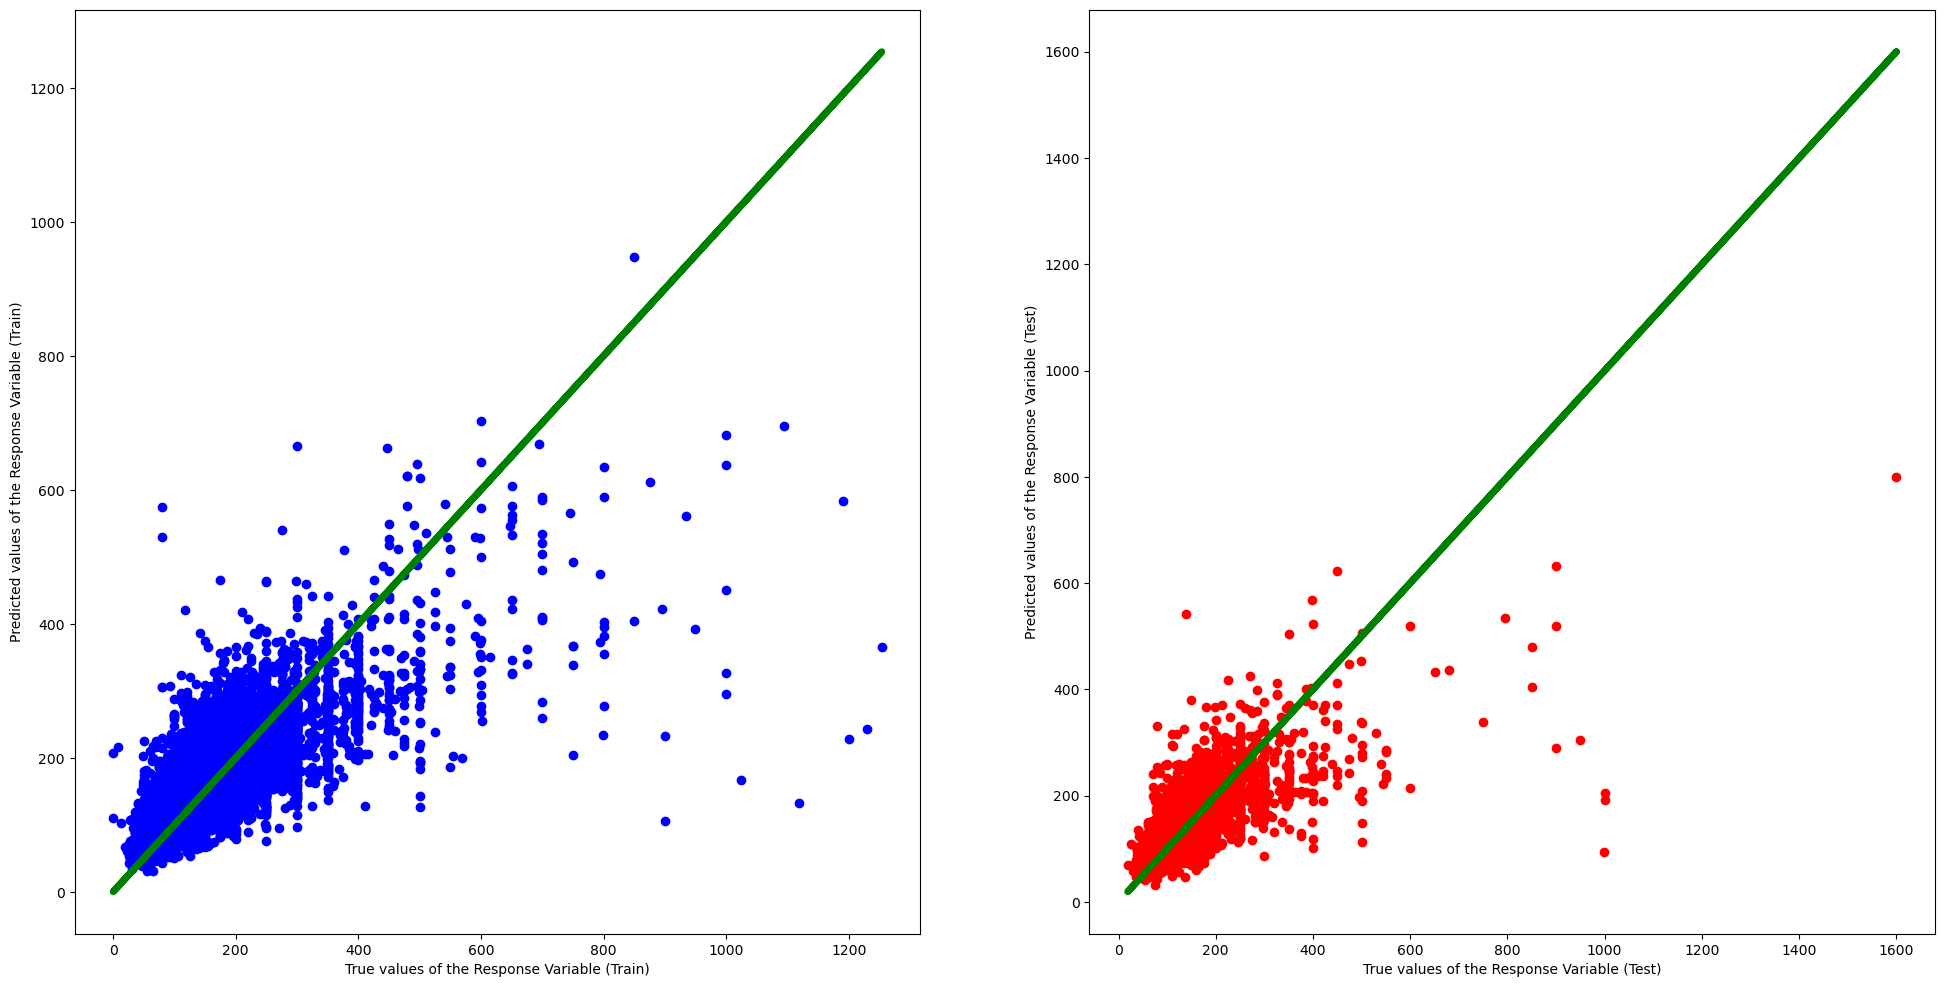

In [99]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_with_dropout, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_pred_with_dropout, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

## Best Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

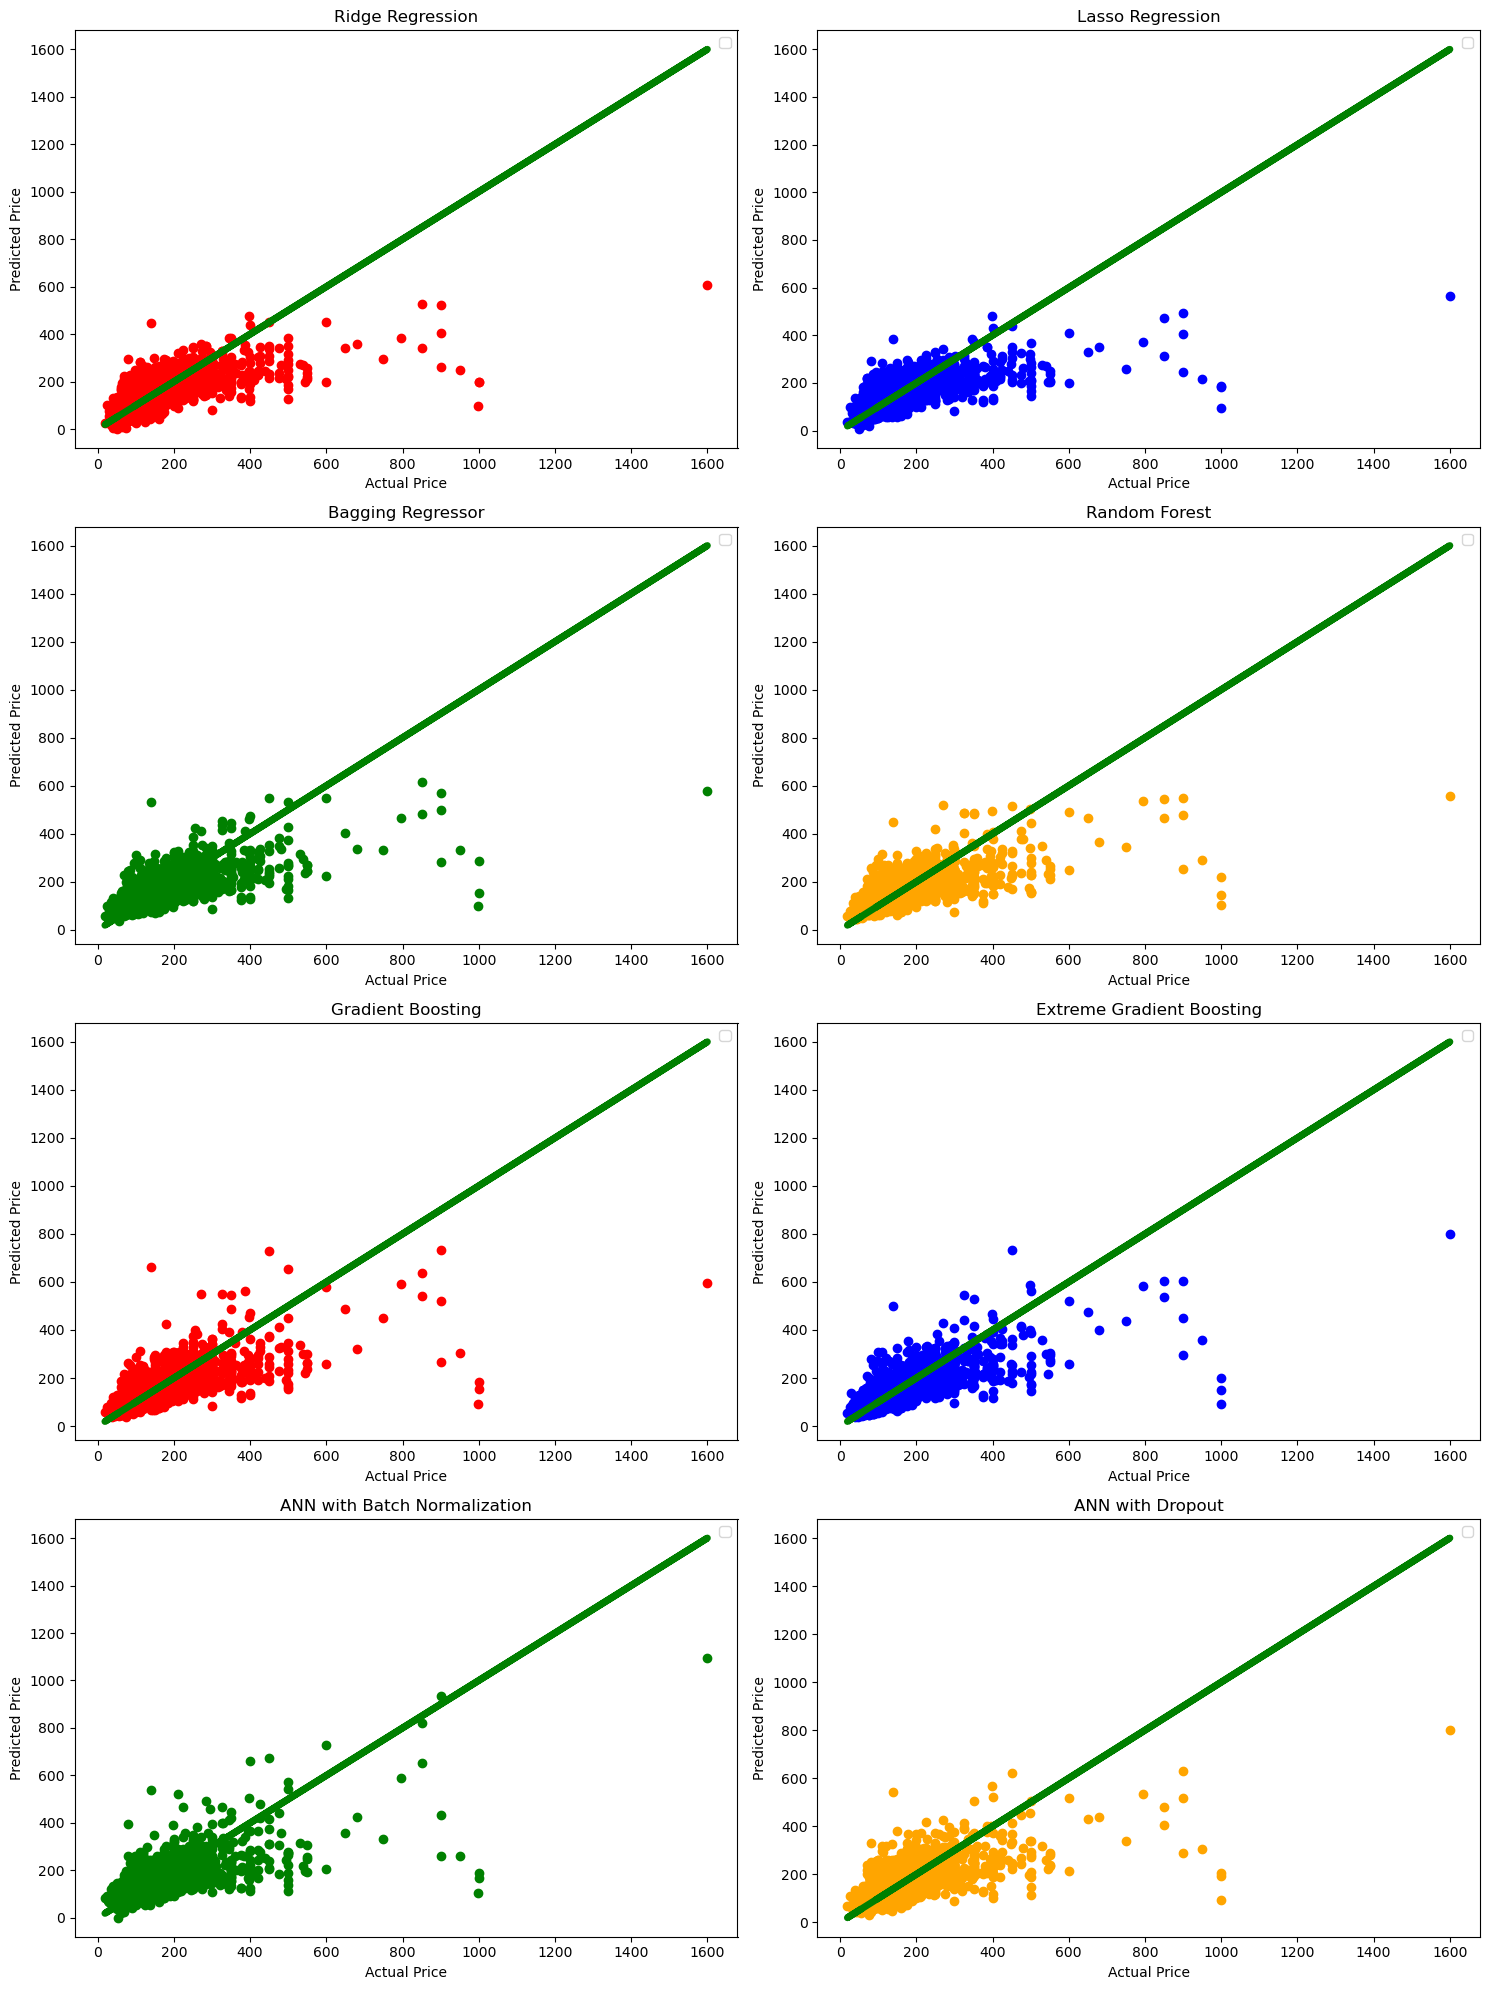

In [112]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Plot each scatter plot on its corresponding axis
axes[0, 0].scatter(y_test, y_pred_ridge, color='red')
axes[0, 0].set_title('Ridge Regression')
axes[0, 0].plot(y_test, y_test, 'g-', linewidth=5)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')

axes[0, 1].scatter(y_test, y_pred_lasso, color='blue')
axes[0, 1].set_title('Lasso Regression')
axes[0, 1].plot(y_test, y_test, 'g-', linewidth=5)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')

axes[1, 0].scatter(y_test, test_prediction_best_bg, color='green')
axes[1, 0].set_title('Bagging Regressor')
axes[1, 0].plot(y_test, y_test, 'g-', linewidth=5)
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')

axes[1, 1].scatter(y_test, y_pred_rf, color='orange')
axes[1, 1].set_title('Random Forest')
axes[1, 1].plot(y_test, y_test, 'g-', linewidth=5)
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')

axes[2, 0].scatter(y_test, test_prediction_best_gb, color='red')
axes[2, 0].set_title('Gradient Boosting')
axes[2, 0].plot(y_test, y_test, 'g-', linewidth=5)
axes[2, 0].set_xlabel('Actual Price')
axes[2, 0].set_ylabel('Predicted Price')

axes[2, 1].scatter(y_test, test_prediction_best, color='blue')
axes[2, 1].set_title('Extreme Gradient Boosting')
axes[2, 1].plot(y_test, y_test, 'g-', linewidth=5)
axes[2, 1].set_xlabel('Actual Price')
axes[2, 1].set_ylabel('Predicted Price')

axes[3, 0].scatter(y_test, y_pred_mlp_bn, color='green')
axes[3, 0].set_title('ANN with Batch Normalization')
axes[3, 0].plot(y_test, y_test, 'g-', linewidth=5)
axes[3, 0].set_xlabel('Actual Price')
axes[3, 0].set_ylabel('Predicted Price')

axes[3, 1].scatter(y_test, y_pred_with_dropout, color='orange')
axes[3, 1].set_title('ANN with Dropout')
axes[3, 1].plot(y_test, y_test, 'g-', linewidth=5)
axes[3, 1].set_xlabel('Actual Price')
axes[3, 1].set_ylabel('Predicted Price')

# Add a legend
for ax in axes.flat:
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### XGB gives a slightly better result than other models for the testing set

## Recommendations

We're using the listing descriptions to recommend similar places.
If a user clicks on a particular listing, listings having similar descriptions to the one that is clicked will be recommended to the user

In [113]:
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [114]:
listings = pd.read_csv('listings_details.csv', usecols = ['id', 'name', 'description'])

In [115]:
listings['name'] = listings['name'].astype('str')
listings['description'] = listings['description'].astype('str')

In [116]:
name_corpus = ' '.join(listings['name'])
description_corpus = ' '.join(listings['description'])

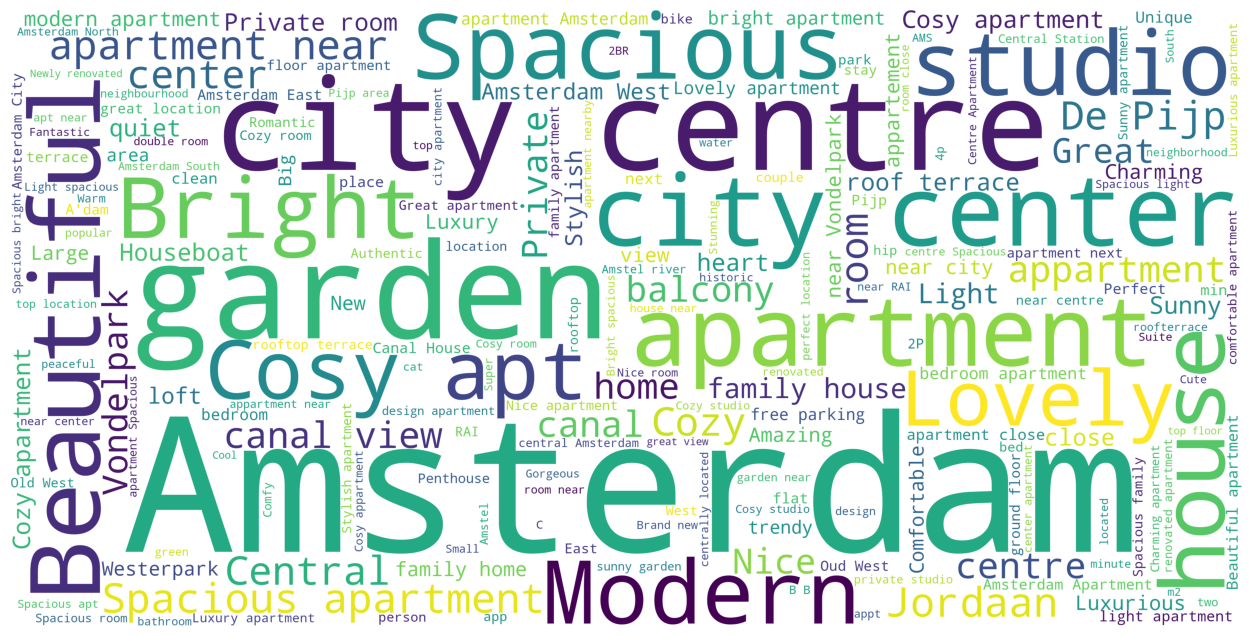

In [117]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

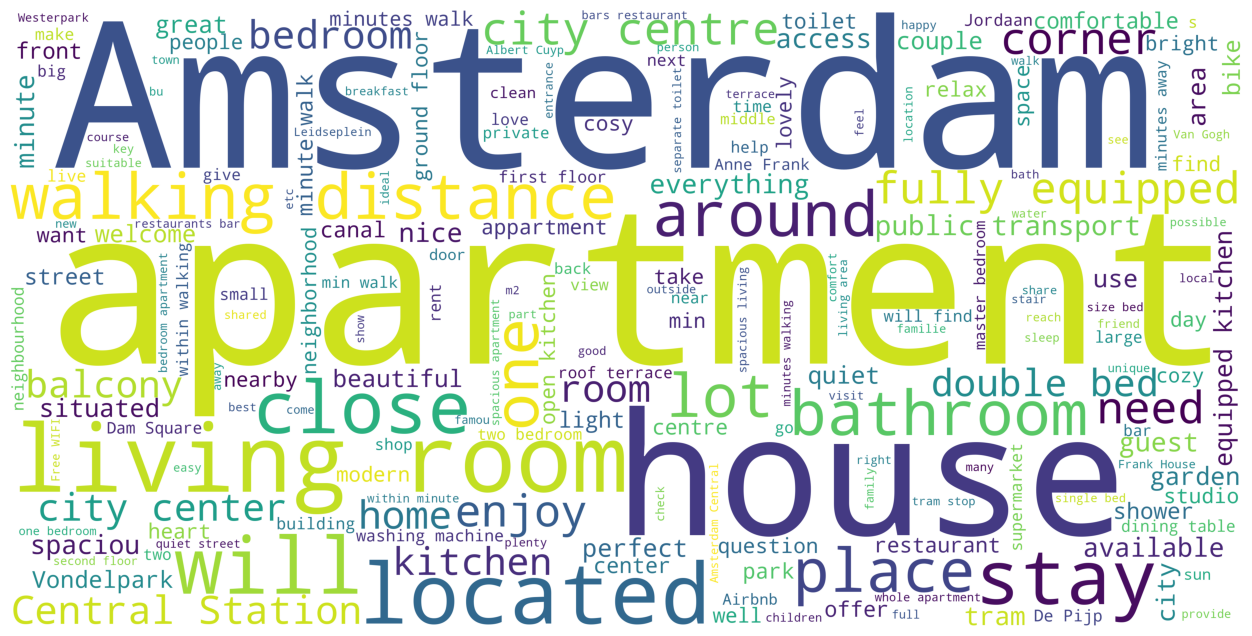

In [118]:
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

In [119]:
listings['content'] = listings[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

In [120]:
listings['content'].fillna('Null', inplace = True)

### Creating a TF-IDF matrix of unigrams and bigrams for each id

In [121]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(listings['content'])

#### Linear kernel computes the dot product between pairs of document vectors, measuring the similarity between them in the original feature space.

In [122]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [123]:
results = {}
for idx, row in listings.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-10:-1]
    similar_items = [(cosine_similarities[idx][i], listings['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

In [124]:
def item(id):
    name   = listings.loc[listings['id'] == id]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + listings.loc[listings['id'] == id]['content'].tolist()[0].split(' // ')[1][0:] + '...'
    prediction = name  + desc
    return prediction

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')
        print('\n')

### Eg: When user clicks on item_id 20168, 5 listings having description similar to this listing will be recommended

In [125]:
recommend(item_id = 20168, num = 5)

Recommending 5 products similar to 100%Centre-Studio 1 Private Floor/Bathroom 
Description: Cozy studio on your own private floor, 100% in a lovely 17th century Dutch townhouse in the heart of the city. Located a stones throw from Rembrandt Square, Dam Square, Leidse Square and Flower Market. Walking distance from Central Station. Comfortable bed and with private bathroom, double glazed windows and night blackout curtains, flat screen TV and mini fridge, Wi-Fi but no kitchen. No bathtub only shower. No curfew. For those who like all facets of city life. In the streets surrounding the house, there are lots of antique shops, and for those who are into browsing for antiques. The Rijksmuseum is a short walk away. The famous nine-streets with all its little boutique shops, cafes, restaurants and whatnot is also around the corner. The Dam Square, Leidse Square and Rembrandt Squarejust minutes to walk. No Curfew and you feel 100% privacy.  Hair dryer, towels and linens are included. Airport p